# Comparing different datasets, sample level, NK-cells

- Comparisons were done using raw protein data
- focusing on NK-cells (or NK + T cells in Easigenomics dataset)

Datasets:

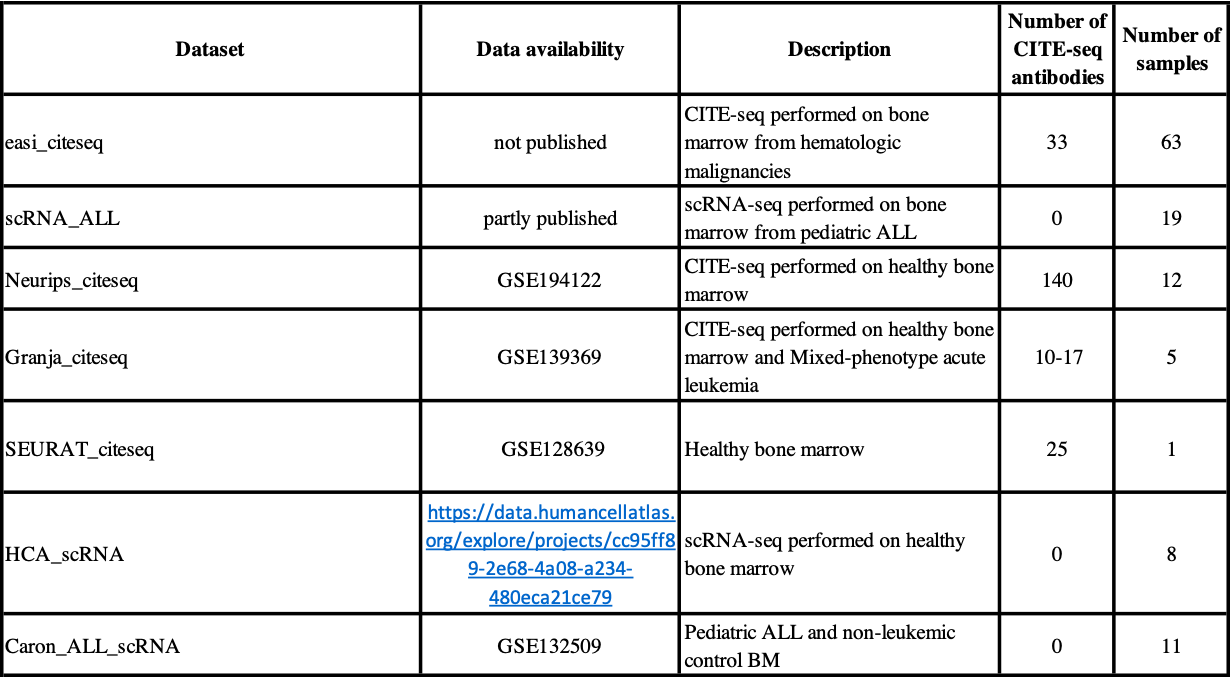

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')



In [3]:
adata.obs['SAMPLE_SET'].unique().tolist()

['N', 'S', 'Granja', 'Caron', 'F', 'A']

In [4]:
adata.obs['batch_group']

GTAGTACCAATCCTTT-1-s4d1    Neurips
CTCAAGAGTCACAGAG-1-s4d1    Neurips
CTGTGGGTCATGCGGC-1-s4d1    Neurips
CGTGATAGTTATCTGG-1-s4d1    Neurips
AGATCCAAGATCGGTG-1-s4d1    Neurips
                            ...   
TTTGTCAGTCATGCAT-1-17        Caron
TTTGTCAGTGCTTCTC-1-17        Caron
TTTGTCAGTGGACGAT-1-17        Caron
TTTGTCATCAACGAAA-1-17        Caron
TTTGTCATCTAACTGG-1-17        Caron
Name: batch_group, Length: 298991, dtype: category
Categories (5, object): ['Caron', 'Easi', 'Granja', 'Neurips', 'Seurat']

In [5]:
adata

AnnData object with n_obs × n_vars = 298991 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

## Neurips 

In [6]:
#Neurips

adata_n=adata[adata.obs['batch_group'] == 'Neurips' ]

adata_n

View of AnnData object with n_obs × n_vars = 80998 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [7]:
adata_n.obs['DIAGNOSIS'] 

GTAGTACCAATCCTTT-1-s4d1    healthy
CTCAAGAGTCACAGAG-1-s4d1    healthy
CTGTGGGTCATGCGGC-1-s4d1    healthy
CGTGATAGTTATCTGG-1-s4d1    healthy
AGATCCAAGATCGGTG-1-s4d1    healthy
                            ...   
GTGGTTAGTCGAGTTT-1-s1d3    healthy
GCTACAACAGTGCGCT-1-s1d3    healthy
AACAAAGGTTGGTACT-1-s1d3    healthy
TGACAGTCATGGCTGC-1-s1d3    healthy
CTGGCAGGTCTCACGG-1-s1d3    healthy
Name: DIAGNOSIS, Length: 80998, dtype: category
Categories (1, object): ['healthy']

In [8]:
adata_n.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT']

In [9]:
#Select only NK-cells

neurips_nk=adata_n[adata_n.obs['new_cell_type'] == 'NK' ]

In [10]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [11]:
neurips_nk_prot=neurips_nk.obsm['protein_expression']

In [12]:
neurips_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
GTAGTACCAATCCTTT-1-s4d1     2     17     38      4     16   181   125     6   
CTGTGGGTCATGCGGC-1-s4d1     1     11     24      3     14   106    53    10   
GCAACATTCGCAAGAG-1-s4d1     1     12     26      0     20    53    75     4   
TCACGGGTCGCACGAC-1-s4d1     0      7     41      3     22   160   118    11   
CGCCAGAAGACCATTC-1-s4d1     2     13     34      1     19   123    83    12   
...                       ...    ...    ...    ...    ...   ...   ...   ...   
ATCATTCGTCCAATCA-1-s1d3     0      4     23      5      5   185   117     5   
ACATTTCCAGCAGTGA-1-s1d3     0      5     15      0      2    58    34     1   
TGAGACTTCCTTCAGC-1-s1d3     0      5     12      1      2    72    60     5   
GAGATGGTCCGCCTAT-1-s1d3     0      8     19      2      5   138   275     8   
ACCTGTCTCACAGTGT-1-s1d3     2      1     15      0      2    66    37     3   

                         CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
GTAGTACCAATCCTTT-1-s4d1     50    12  ...     15    29     14      0     0   
CTGTGGGTCATGCGGC-1-s4d1     37    21  ...     14    16     20      0     0   
GCAACATTCGCAAGAG-1-s4d1     40    23  ...      4    25      9      0     0   
TCACGGGTCGCACGAC-1-s4d1     70    15  ...      8    22     16      0     0   
CGCCAGAAGACCATTC-1-s4d1     59    16  ...     10    30     10      0     0   
...                        ...   ...  ...    ...   ...    ...    ...   ...   
ATCATTCGTCCAATCA-1-s1d3     10     4  ...      7    12      4      0     0   
ACATTTCCAGCAGTGA-1-s1d3      5    11  ...      7     7      2      0     0   
TGAGACTTCCTTCAGC-1-s1d3     12     6  ...      5     5      0      0     0   
GAGATGGTCCGCCTAT-1-s1d3     14     6  ...      8     7      5      0     0   
ACCTGTCTCACAGTGT-1-s1d3      8    14  ...      5     5     11      0     0   

                         CD10  CD90  CD15  CD117  CD66ace  
GTAGTACCAATCCTTT-1-s4d1     0     0     0      0        0  
CTGTGGGTCATGCGGC-1-s4d1     0     0     0      0        0  
GCAACATTCGCAAGAG-1-s4d1     0     0     0      0        0  
TCACGGGTCGCACGAC-1-s4d1     0     0     0      0        0  
CGCCAGAAGACCATTC-1-s4d1     0     0     0      0        0  
...                       ...   ...   ...    ...      ...  
ATCATTCGTCCAATCA-1-s1d3     0     0     0      0        0  
ACATTTCCAGCAGTGA-1-s1d3     0     0     0      0        0  
TGAGACTTCCTTCAGC-1-s1d3     0     0     0      0        0  
GAGATGGTCCGCCTAT-1-s1d3     0     0     0      0        0  
ACCTGTCTCACAGTGT-1-s1d3     0     0     0      0        0  

[7388 rows x 141 columns]

In [13]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

for col in neurips_nk_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


## Granja

In [14]:
#Selecting Granja dataset

adata_granja=adata[adata.obs['batch_group'] == 'Granja' ]

adata_granja

View of AnnData object with n_obs × n_vars = 24204 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [15]:
adata_granja.obs['DIAGNOSIS'] 

BMMC_D1T1:AAACCCAAGATGCAGC-1    healthy
BMMC_D1T1:AAACCCACAAACTCGT-1    healthy
BMMC_D1T1:AAACCCACAGTGTACT-1    healthy
BMMC_D1T1:AAACCCATCGCTATTT-1    healthy
BMMC_D1T1:AAACGAACACCCAATA-1    healthy
                                 ...   
MPAL5_T1:TTTGTCAAGCGTGAGT-1        MPAL
MPAL5_T1:TTTGTCACACGTCAGC-1        MPAL
MPAL5_T1:TTTGTCACATCGTCGG-1        MPAL
MPAL5_T1:TTTGTCACATTTCACT-1        MPAL
MPAL5_T1:TTTGTCATCGTAGGAG-1        MPAL
Name: DIAGNOSIS, Length: 24204, dtype: category
Categories (2, object): ['MPAL', 'healthy']

In [16]:
adata_granja.obs['new_cell_type'].unique()

['T', 'Myel', 'B', 'DC', 'NK', 'E', 'Prog', 'Stromal', 'Megakaryocyte', NaN]
Categories (9, object): ['B', 'DC', 'E', 'Megakaryocyte', ..., 'NK', 'Prog', 'Stromal', 'T']

In [17]:
#Select T-cells
granja_tcell=adata_granja[adata_granja.obs['new_cell_type'] == 'T' ]

In [18]:
granja_tcell

View of AnnData object with n_obs × n_vars = 4489 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [19]:
granja_tcell_prot=granja_tcell.obsm['protein_expression']

granja_tcell_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAACAGCAGTCC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAACATGACGAG-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGAATCAAGCCAT-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1     0      0      0      0      0     0     0   
...                            ...    ...    ...    ...    ...   ...   ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGGTTTCACGATCA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGGTTTCCACATAG-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1     0      0      0      0      0     0     0   

                              CD40  CD154  CD52  ...  CD101  CD88  CD224  \
BMMC_D1T1:AAACCCAAGATGCAGC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAACAGCAGTCC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAACATGACGAG-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGAATCAAGCCAT-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAACGCTAGCCGTAAG-1     0      0     0  ...      0     0      0   
...                            ...    ...   ...  ...    ...   ...    ...   
BMMC_D1T2:TTTGGTTGTCTTCATT-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGGTTTCACGATCA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGGTTTCCACATAG-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGTTGCAGTGGTGA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGTTGCATGTGTCA-1     0      0     0  ...      0     0      0   

                              CD197  CD34  CD10  CD90  CD15  CD117  CD66ace  
BMMC_D1T1:AAACCCAAGATGCAGC-1      0     0     0     0    34      0        0  
BMMC_D1T1:AAACGAACAGCAGTCC-1      0     0     0     0    44      0        0  
BMMC_D1T1:AAACGAACATGACGAG-1      0     0     0     0    64      0        0  
BMMC_D1T1:AAACGAATCAAGCCAT-1      0     0     0     0    45      0        0  
BMMC_D1T1:AAACGCTAGCCGTAAG-1      0     0     0     0    58      0        0  
...                             ...   ...   ...   ...   ...    ...      ...  
BMMC_D1T2:TTTGGTTGTCTTCATT-1      0     0     0     0    36      0        0  
BMMC_D1T2:TTTGGTTTCACGATCA-1      0     0     0     0    44      0        0  
BMMC_D1T2:TTTGGTTTCCACATAG-1      0     0     0     0    33      0        0  
BMMC_D1T2:TTTGTTGCAGTGGTGA-1      0     0     0     0    38      0        0  
BMMC_D1T2:TTTGTTGCATGTGTCA-1      0     0     0     0    58      0        0  

[4489 rows x 141 columns]

In [20]:
#To exclude columns that contain only zeros

granja_tcell_prot = pd.DataFrame(granja_tcell_prot)
granja_tcell_prot != 0
(granja_tcell_prot != 0).any(axis=0)
granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]
granja_tcell_prot = granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]

for col in granja_tcell_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


In [21]:
#Select NK-cells
granja_nk=adata_granja[adata_granja.obs['new_cell_type'] == 'NK' ]

In [22]:
granja_nk

View of AnnData object with n_obs × n_vars = 1033 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [23]:
granja_nk_prot=granja_nk.obsm['protein_expression']

granja_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1     0      0      0      0      0     0     0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1     0      0      0      0      0     0     0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1     0      0      0      0      0     0     0   
...                            ...    ...    ...    ...    ...   ...   ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTCACACAACGCATT-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTCAGTTCCAACACA-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1     0      0      0      0      0     0     0   
BMMC_D1T2:TTTGACTGTAGTATAG-1     0      0      0      0      0     0     0   

                              CD40  CD154  CD52  ...  CD101  CD88  CD224  \
BMMC_D1T1:AAAGAACTCGAAGAAT-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAAGGGCAGAAGTGTT-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAAGTCCGTCGGAAAC-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AAAGTGAGTTACCCAA-1     0      0     0  ...      0     0      0   
BMMC_D1T1:AACAAAGAGTCTGCGC-1     0      0     0  ...      0     0      0   
...                            ...    ...   ...  ...    ...   ...    ...   
BMMC_D1T2:TTTACTGGTCAGGAGT-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTCACACAACGCATT-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTCAGTTCCAACACA-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTCAGTTCTCGGCTT-1     0      0     0  ...      0     0      0   
BMMC_D1T2:TTTGACTGTAGTATAG-1     0      0     0  ...      0     0      0   

                              CD197  CD34  CD10  CD90  CD15  CD117  CD66ace  
BMMC_D1T1:AAAGAACTCGAAGAAT-1      0     0     0     0    74      0        0  
BMMC_D1T1:AAAGGGCAGAAGTGTT-1      0     0     0     0    46      0        0  
BMMC_D1T1:AAAGTCCGTCGGAAAC-1      0     0     0     0    44      0        0  
BMMC_D1T1:AAAGTGAGTTACCCAA-1      0     0     0     0    74      0        0  
BMMC_D1T1:AACAAAGAGTCTGCGC-1      0     0     0     0    51      0        0  
...                             ...   ...   ...   ...   ...    ...      ...  
BMMC_D1T2:TTTACTGGTCAGGAGT-1      0     0     0     0    41      0        0  
BMMC_D1T2:TTTCACACAACGCATT-1      0     0     0     0    59      0        0  
BMMC_D1T2:TTTCAGTTCCAACACA-1      0     0     0     0    37      0        0  
BMMC_D1T2:TTTCAGTTCTCGGCTT-1      0     0     0     0    40      0        0  
BMMC_D1T2:TTTGACTGTAGTATAG-1      0     0     0     0    36      0        0  

[1033 rows x 141 columns]

In [24]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]

for col in granja_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


## Easigenomics

In [25]:
#Selecting Easigenomic dataset
adata_f=adata[adata.obs['batch_group'] == 'Easi' ]

adata_f

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [26]:
adata_f.obs['DIAGNOSIS'] 

AAACCTGAGCCCTAAT-1-100    Aplastic anemia
AAACCTGCAAGCCGCT-1-100    Aplastic anemia
AAACCTGCACTGTCGG-1-100    Aplastic anemia
AAACCTGCAGACGCTC-1-100    Aplastic anemia
AAACCTGTCCTTAATC-1-100    Aplastic anemia
                               ...       
TTTGTCAGTACATCCA-1-158              B-ALL
TTTGTCAGTAGGCATG-1-158              B-ALL
TTTGTCAGTATGCTTG-1-158              B-ALL
TTTGTCATCAAACCAC-1-158              B-ALL
TTTGTCATCCATGAAC-1-158              B-ALL
Name: DIAGNOSIS, Length: 121340, dtype: category
Categories (10, object): ['AML', 'Aplastic anemia', 'B-ALL', 'Blastic plasmacytoid dendritic cell leukemia', ..., 'Multiple myeloma', 'Plasma cell leukemia', 'RAEB-2', 'T-ALL']

In [27]:
adata_f.obs['new_cell_type'].unique()

['NK', 'non-leukemic', 'preleukemic', 'non-leukemic?', NaN, ..., 'leukemic?', 'doublets?', 'unknown', '0', 'preleukemic?']
Length: 11
Categories (10, object): ['0', 'NK', 'doublets?', 'leukemic', ..., 'non-leukemic?', 'preleukemic', 'preleukemic?', 'unknown']

In [28]:
#Select NK + T

easi_nkt=adata_f[adata_f.obs['cell_type'] == 'NKT' ]

In [29]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [30]:
easi_nkt_prot=easi_nkt.obsm['protein_expression']

easi_nkt_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
AAACCTGAGCCCTAAT-1-100     0      0      0      0      0     0     0     0   
AAACCTGCAGACGCTC-1-100     0      0      0      0      0     0     0     0   
AAACCTGTCCTTAATC-1-100     0      0      0      0      0     0     0     0   
AAACGGGGTCTCTCGT-1-100     0      0      0      0      0     0     0     0   
AAAGATGTCCAGTAGT-1-100     0      0      0      0      0     0     0     0   
...                      ...    ...    ...    ...    ...   ...   ...   ...   
TTAGGCACAGAAGCAC-1-158     0      0      0      0      0     0     0     0   
TTCTACAGTGAGCGAT-1-158     0      0      0      0      0     0     0     0   
TTGAACGAGCGGATCA-1-158     0      0      0      0      0     0     0     0   
TTGCCGTAGATCCGAG-1-158     0      0      0      0      0     0     0     0   
TTTGCGCTCTGTCTCG-1-158     0      0      0      0      0     0     0     0   

                        CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  \
AAACCTGAGCCCTAAT-1-100      0     0  ...      0     0      0     17    25   
AAACCTGCAGACGCTC-1-100      0     0  ...      0     0      0     28    34   
AAACCTGTCCTTAATC-1-100      0     0  ...      0     0      0     20    27   
AAACGGGGTCTCTCGT-1-100      0     0  ...      0     0      0     22    21   
AAAGATGTCCAGTAGT-1-100      0     0  ...      0     0      0     19    22   
...                       ...   ...  ...    ...   ...    ...    ...   ...   
TTAGGCACAGAAGCAC-1-158      0     0  ...      0     0      0      4    15   
TTCTACAGTGAGCGAT-1-158      0     0  ...      0     0      0      4    11   
TTGAACGAGCGGATCA-1-158      0     0  ...      0     0      0      5    10   
TTGCCGTAGATCCGAG-1-158      0     0  ...      0     0      0      4    23   
TTTGCGCTCTGTCTCG-1-158      0     0  ...      0     0      0      6    12   

                        CD10  CD90  CD15  CD117  CD66ace  
AAACCTGAGCCCTAAT-1-100    17     0    43     11       25  
AAACCTGCAGACGCTC-1-100    12     0    51     14       21  
AAACCTGTCCTTAATC-1-100    16     0    30     10       17  
AAACGGGGTCTCTCGT-1-100    19     0    43      7       25  
AAAGATGTCCAGTAGT-1-100     7     0    47     14       15  
...                      ...   ...   ...    ...      ...  
TTAGGCACAGAAGCAC-1-158   105     0     9      4        4  
TTCTACAGTGAGCGAT-1-158    68     0     7      1        7  
TTGAACGAGCGGATCA-1-158    40     0     6      1        9  
TTGCCGTAGATCCGAG-1-158   151     0    11      4        8  
TTTGCGCTCTGTCTCG-1-158    36     0     9      1        2  

[27738 rows x 141 columns]

In [31]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]

for col in easi_nkt_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


### Seurat 

In [46]:
#Seurat

adata_s=adata[adata.obs['batch_group'] == 'Seurat' ]

adata_s

View of AnnData object with n_obs × n_vars = 29556 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [47]:
adata_s.obs['DIAGNOSIS'] 

a_AAACCTGAGCTTATCG-1    healthy
a_AAACCTGAGGTGGGTT-1    healthy
a_AAACCTGAGTACATGA-1    healthy
a_AAACCTGCAAACCTAC-1    healthy
a_AAACCTGCAAGGTGTG-1    healthy
                         ...   
b_TTTGTCATCCGAGCCA-1    healthy
b_TTTGTCATCCGTAGGC-1    healthy
b_TTTGTCATCCTCGCAT-1    healthy
b_TTTGTCATCGCCGTGA-1    healthy
b_TTTGTCATCGTTTGCC-1    healthy
Name: DIAGNOSIS, Length: 29556, dtype: category
Categories (1, object): ['healthy']

In [48]:
adata_s.obs['cell_type'].unique().tolist()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [49]:
#Select NK-cells

seurat_nk=adata_s[adata_s.obs['new_cell_type'] == 'NK' ]

In [50]:
seurat_nk

View of AnnData object with n_obs × n_vars = 1355 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [51]:
seurat_nk_prot=seurat_nk.obsm['protein_expression']

seurat_nk_prot

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  \
a_AAACCTGTCTAACGGT-1     0      0      0      0      0     0     0     0   
a_AAACGGGGTTCGGCAC-1     0      0      0      0      0     0     0     0   
a_AAAGCAAAGACCTAGG-1     0      0      0      0      0     0     0     0   
a_AAAGCAAAGCGTCAAG-1     0      0      0      0      0     0     0     0   
a_AAAGCAACAATGTTGC-1     0      0      0      0      0     0     0     0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
b_TTTATGCTCAACACAC-1     0      0      0      0      0     0     0     0   
b_TTTCCTCAGATCCCGC-1     0      0      0      0      0     0     0     0   
b_TTTCCTCAGTACATGA-1     0      0      0      0      0     0     0     0   
b_TTTGCGCGTGGTCTCG-1     0      0      0      0      0     0     0     0   
b_TTTGGTTTCGAGAGCA-1     0      0      0      0      0     0     0     0   

                      CD154  CD52  ...  CD101  CD88  CD224  CD197  CD34  CD10  \
a_AAACCTGTCTAACGGT-1      0     0  ...      0     0      0     11    11     0   
a_AAACGGGGTTCGGCAC-1      0     0  ...      0     0      0      4     0     0   
a_AAAGCAAAGACCTAGG-1      0     0  ...      0     0      0      7     9     0   
a_AAAGCAAAGCGTCAAG-1      0     0  ...      0     0      0     22    15     0   
a_AAAGCAACAATGTTGC-1      0     0  ...      0     0      0     12    11     0   
...                     ...   ...  ...    ...   ...    ...    ...   ...   ...   
b_TTTATGCTCAACACAC-1      0     0  ...      0     0      0     12     7     0   
b_TTTCCTCAGATCCCGC-1      0     0  ...      0     0      0      3    21     0   
b_TTTCCTCAGTACATGA-1      0     0  ...      0     0      0     11     5     0   
b_TTTGCGCGTGGTCTCG-1      0     0  ...      0     0      0      5     7     0   
b_TTTGGTTTCGAGAGCA-1      0     0  ...      0     0      0      6    11     0   

                      CD90  CD15  CD117  CD66ace  
a_AAACCTGTCTAACGGT-1     0     0      0        0  
a_AAACGGGGTTCGGCAC-1     0     0      0        0  
a_AAAGCAAAGACCTAGG-1     0     0      0        0  
a_AAAGCAAAGCGTCAAG-1     0     0      0        0  
a_AAAGCAACAATGTTGC-1     0     0      0        0  
...                    ...   ...    ...      ...  
b_TTTATGCTCAACACAC-1     0     0      0        0  
b_TTTCCTCAGATCCCGC-1     0     0      0        0  
b_TTTCCTCAGTACATGA-1     0     0      0        0  
b_TTTGCGCGTGGTCTCG-1     0     0      0        0  
b_TTTGGTTTCGAGAGCA-1     0     0      0        0  

[1355 rows x 141 columns]

In [52]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]

for col in seurat_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


## Comparisons

### Neurips

In [53]:
adata_neurips=adata[adata.obs['SAMPLE_SET'] == 'N' ]

In [54]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [55]:
samples

['s4d1',
 's3d6',
 's1d2',
 's2d1',
 's3d7',
 's2d4',
 's1d1',
 's4d9',
 's4d8',
 's2d5',
 's3d1',
 's1d3']

In [56]:
sample1=adata_neurips[adata_neurips.obs['POOL'] == 's4d1']
sample2=adata_neurips[adata_neurips.obs['POOL'] == 's3d6']
sample3=adata_neurips[adata_neurips.obs['POOL']== 's1d2']
sample4=adata_neurips[adata_neurips.obs['POOL']== 's2d1']
sample5=adata_neurips[adata_neurips.obs['POOL']== 's3d7']
sample6=adata_neurips[adata_neurips.obs['POOL'] == 's2d4']
sample7=adata_neurips[adata_neurips.obs['POOL'] == 's1d1']
sample8=adata_neurips[adata_neurips.obs['POOL']== 's4d9']
sample9=adata_neurips[adata_neurips.obs['POOL'] == 's4d8']
sample10=adata_neurips[adata_neurips.obs['POOL'] == 's2d5']
sample11=adata_neurips[adata_neurips.obs['POOL'] == 's3d1']
sample12=adata_neurips[adata_neurips.obs['POOL'] == 's1d3']

In [57]:
sample1=sample1[sample1.obs['cell_type'] == 'NK']
sample2=sample2[sample2.obs['cell_type'] == 'NK']
sample3=sample3[sample3.obs['cell_type'] == 'NK']
sample4=sample4[sample4.obs['cell_type'] == 'NK']
sample5=sample5[sample5.obs['cell_type'] == 'NK']
sample6=sample6[sample6.obs['cell_type'] == 'NK']
sample7=sample7[sample7.obs['cell_type'] == 'NK']
sample8=sample8[sample8.obs['cell_type'] == 'NK']
sample9=sample9[sample9.obs['cell_type'] == 'NK']
sample10=sample10[sample10.obs['cell_type'] == 'NK']
sample11=sample11[sample11.obs['cell_type'] == 'NK']
sample12=sample12[sample12.obs['cell_type'] == 'NK']


In [58]:
sample_s4d1=sample1.obsm['protein_expression']
sample_s3d6=sample2.obsm['protein_expression']
sample_s1d2= sample3.obsm['protein_expression']
sample_s2d1=sample4.obsm['protein_expression']
sample_s3d7= sample5.obsm['protein_expression']
sample_s2d4=sample6.obsm['protein_expression']
sample_s1d1= sample7.obsm['protein_expression'] 
sample_s4d9=sample8.obsm['protein_expression']
sample_s4d8= sample9.obsm['protein_expression'] 
sample_s2d5=sample10.obsm['protein_expression']
sample_s3d1= sample11.obsm['protein_expression']
sample_s1d3=sample12.obsm['protein_expression']

In [59]:
df1=sample_s4d1.mean(axis=0).sort_values()
df2=sample_s3d6.mean(axis=0).sort_values()
df3=sample_s1d2.mean(axis=0).sort_values()
df4=sample_s2d1.mean(axis=0).sort_values()
df5=sample_s3d7.mean(axis=0).sort_values()
df6=sample_s2d4.mean(axis=0).sort_values()
df7=sample_s1d1.mean(axis=0).sort_values()
df8=sample_s4d9.mean(axis=0).sort_values()
df9=sample_s4d8.mean(axis=0).sort_values()
df10=sample_s2d5.mean(axis=0).sort_values()
df11=sample_s3d1.mean(axis=0).sort_values()
df12=sample_s1d3.mean(axis=0).sort_values()

In [60]:
#combining all dataframes

df_all=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=1)

In [61]:
#adding columns names (=sample names)

df_all.columns=['s4d1','s3d6','s1d2', 's2d1', 's3d7','s2d4','s1d1', 's4d9', 's4d8', 's2d5', 's3d1', 's1d3' ]

df_all

s4d1       s3d6        s1d2       s2d1       s3d7       s2d4  \
CD66ace    0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   
CD15       0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   
CD90       0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   
CD10       0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   
CD34       0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   
...             ...        ...         ...        ...        ...        ...   
CD94     133.833002  14.733333  468.740406  27.032609  11.353088  42.270270   
CD7      203.077535   7.797531  336.069977  13.641304   6.378130  27.945946   
CD16     233.789264   5.656790  224.923251  18.920290   6.451586  27.391892   
CD11a    245.594433   7.118519  265.327314  14.217391   8.339733  27.405405   
CD45RA   354.023857  34.402469  815.155756  48.188406  44.875626  85.608108   

               s1d1        s4d9        s4d8       s2d5        s3d1        s1d3  
CD66ace    0.000000    0.000000    0.000000   0.000000    0.000000    0.000000  
CD15       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000  
CD90       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000  
CD10       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000  
CD34       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000  
...             ...         ...         ...        ...         ...         ...  
CD94     390.153846   51.431472  211.255725  22.982664   62.538462  329.730038  
CD7      490.857143  189.062606  418.587786  12.223540   40.269231  293.140684  
CD16     269.494505  159.653130  551.167939  22.170620   18.756410  253.874525  
CD11a    351.142857  176.213198  505.877863  16.762774   30.628205  259.163498  
CD45RA   795.318681  271.664975  682.503817  50.282847  114.487179  801.798479  

[141 rows x 12 columns]

In [65]:
df_all=df_all.T

df_all

s4d1       s3d6        s1d2       s2d1       s3d7       s2d4  \
CD33      0.928429   0.288889    1.875847   0.115942   0.388982   0.351351   
CD86      1.304175   0.212346    0.623025   0.094203   0.191152   0.378378   
TCRVd2    1.497018   0.335802    0.819413   0.083333   0.252922   0.310811   
CD62P     1.558648   0.251852    0.767494   0.173913   0.398164   0.472973   
CD22      1.616302   0.167901    0.494357   0.123188   0.138564   0.472973   
...            ...        ...         ...        ...        ...        ...   
CD94    133.833002  14.733333  468.740406  27.032609  11.353088  42.270270   
CD7     203.077535   7.797531  336.069977  13.641304   6.378130  27.945946   
CD16    233.789264   5.656790  224.923251  18.920290   6.451586  27.391892   
CD11a   245.594433   7.118519  265.327314  14.217391   8.339733  27.405405   
CD45RA  354.023857  34.402469  815.155756  48.188406  44.875626  85.608108   

              s1d1        s4d9        s4d8       s2d5        s3d1        s1d3  
CD33      0.406593    0.795262    1.076336   0.104015    0.897436    0.768061  
CD86      0.307692    0.835871    1.301527   0.094891    0.730769    0.376426  
TCRVd2    0.428571    0.505922    0.820611   0.095803    0.987179    0.528517  
CD62P     0.670330    0.717428    1.412214   0.292883    1.025641    0.661597  
CD22      0.538462    1.636210    1.187023   0.110401    0.705128    0.570342  
...            ...         ...         ...        ...         ...         ...  
CD94    390.153846   51.431472  211.255725  22.982664   62.538462  329.730038  
CD7     490.857143  189.062606  418.587786  12.223540   40.269231  293.140684  
CD16    269.494505  159.653130  551.167939  22.170620   18.756410  253.874525  
CD11a   351.142857  176.213198  505.877863  16.762774   30.628205  259.163498  
CD45RA  795.318681  271.664975  682.503817  50.282847  114.487179  801.798479  

[134 rows x 12 columns]

In [63]:
#To exclude columns that contain only zeros from NK-only file

df_all = pd.DataFrame(df_all)
df_all != 0
(df_all != 0).any(axis=0)
df_all.loc[:, (df_all != 0).any(axis=0)]
df_all = df_all.loc[:, (df_all != 0).any(axis=0)]

df_all

CD33      CD86    TCRVd2     CD62P      CD22      CD64     CD194  \
s4d1  0.928429  1.304175  1.497018  1.558648  1.616302  1.765408  1.886680   
s3d6  0.288889  0.212346  0.335802  0.251852  0.167901  0.390123  0.449383   
s1d2  1.875847  0.623025  0.819413  0.767494  0.494357  0.930023  0.645598   
s2d1  0.115942  0.094203  0.083333  0.173913  0.123188  0.202899  0.322464   
s3d7  0.388982  0.191152  0.252922  0.398164  0.138564  0.380634  0.412354   
s2d4  0.351351  0.378378  0.310811  0.472973  0.472973  0.378378  0.729730   
s1d1  0.406593  0.307692  0.428571  0.670330  0.538462  0.670330  0.659341   
s4d9  0.795262  0.835871  0.505922  0.717428  1.636210  0.878173  0.866328   
s4d8  1.076336  1.301527  0.820611  1.412214  1.187023  1.202290  1.290076   
s2d5  0.104015  0.094891  0.095803  0.292883  0.110401  0.199818  0.440693   
s3d1  0.897436  0.730769  0.987179  1.025641  0.705128  1.153846  1.089744   
s1d3  0.768061  0.376426  0.528517  0.661597  0.570342  0.745247  0.745247   

          CD21      CD1c       IgD  ...        CD47       CD162        CD45  \
s4d1  2.015905  2.176938  2.226640  ...  104.095427  117.771372  120.000000   
s3d6  0.365432  0.464198  0.249383  ...    3.367901    5.600000    6.520988   
s1d2  0.627540  0.670429  0.650113  ...  120.390519  179.571106  210.282167   
s2d1  0.213768  0.137681  0.184783  ...    9.347826   17.126812   12.449275   
s3d7  0.261269  0.376461  0.223706  ...    3.691152    7.108514    7.151085   
s2d4  0.337838  0.432432  0.243243  ...   11.851351   23.783784   23.500000   
s1d1  0.714286  0.582418  0.637363  ...  157.736264  208.241758  212.703297   
s4d9  2.103215  1.162437  2.255499  ...   89.578680   68.947547  131.289340   
s4d8  1.767176  1.347328  2.664122  ...  272.564885  225.633588  304.706107   
s2d5  0.177920  0.166971  0.109489  ...   13.496350   24.104927   15.689781   
s3d1  1.256410  1.769231  0.961538  ...   13.012821   15.128205   17.282051   
s1d3  0.794677  0.916350  0.912548  ...  116.174905  180.186312  208.832700   

            CD38         IgM        CD94         CD7        CD16       CD11a  \
s4d1  121.745527  129.274354  133.833002  203.077535  233.789264  245.594433   
s3d6    4.486420    2.162963   14.733333    7.797531    5.656790    7.118519   
s1d2  130.559819   75.178330  468.740406  336.069977  224.923251  265.327314   
s2d1    6.735507    8.684783   27.032609   13.641304   18.920290   14.217391   
s3d7    5.533389    3.263773   11.353088    6.378130    6.451586    8.339733   
s2d4   14.959459    4.810811   42.270270   27.945946   27.391892   27.405405   
s1d1  130.549451   39.120879  390.153846  490.857143  269.494505  351.142857   
s4d9  129.316413   11.949239   51.431472  189.062606  159.653130  176.213198   
s4d8  204.709924  364.229008  211.255725  418.587786  551.167939  505.877863   
s2d5   14.784672    9.980839   22.982664   12.223540   22.170620   16.762774   
s3d1   25.525641    7.205128   62.538462   40.269231   18.756410   30.628205   
s1d3  185.079848  219.334601  329.730038  293.140684  253.874525  259.163498   

          CD45RA  
s4d1  354.023857  
s3d6   34.402469  
s1d2  815.155756  
s2d1   48.188406  
s3d7   44.875626  
s2d4   85.608108  
s1d1  795.318681  
s4d9  271.664975  
s4d8  682.503817  
s2d5   50.282847  
s3d1  114.487179  
s1d3  801.798479  

[12 rows x 134 columns]

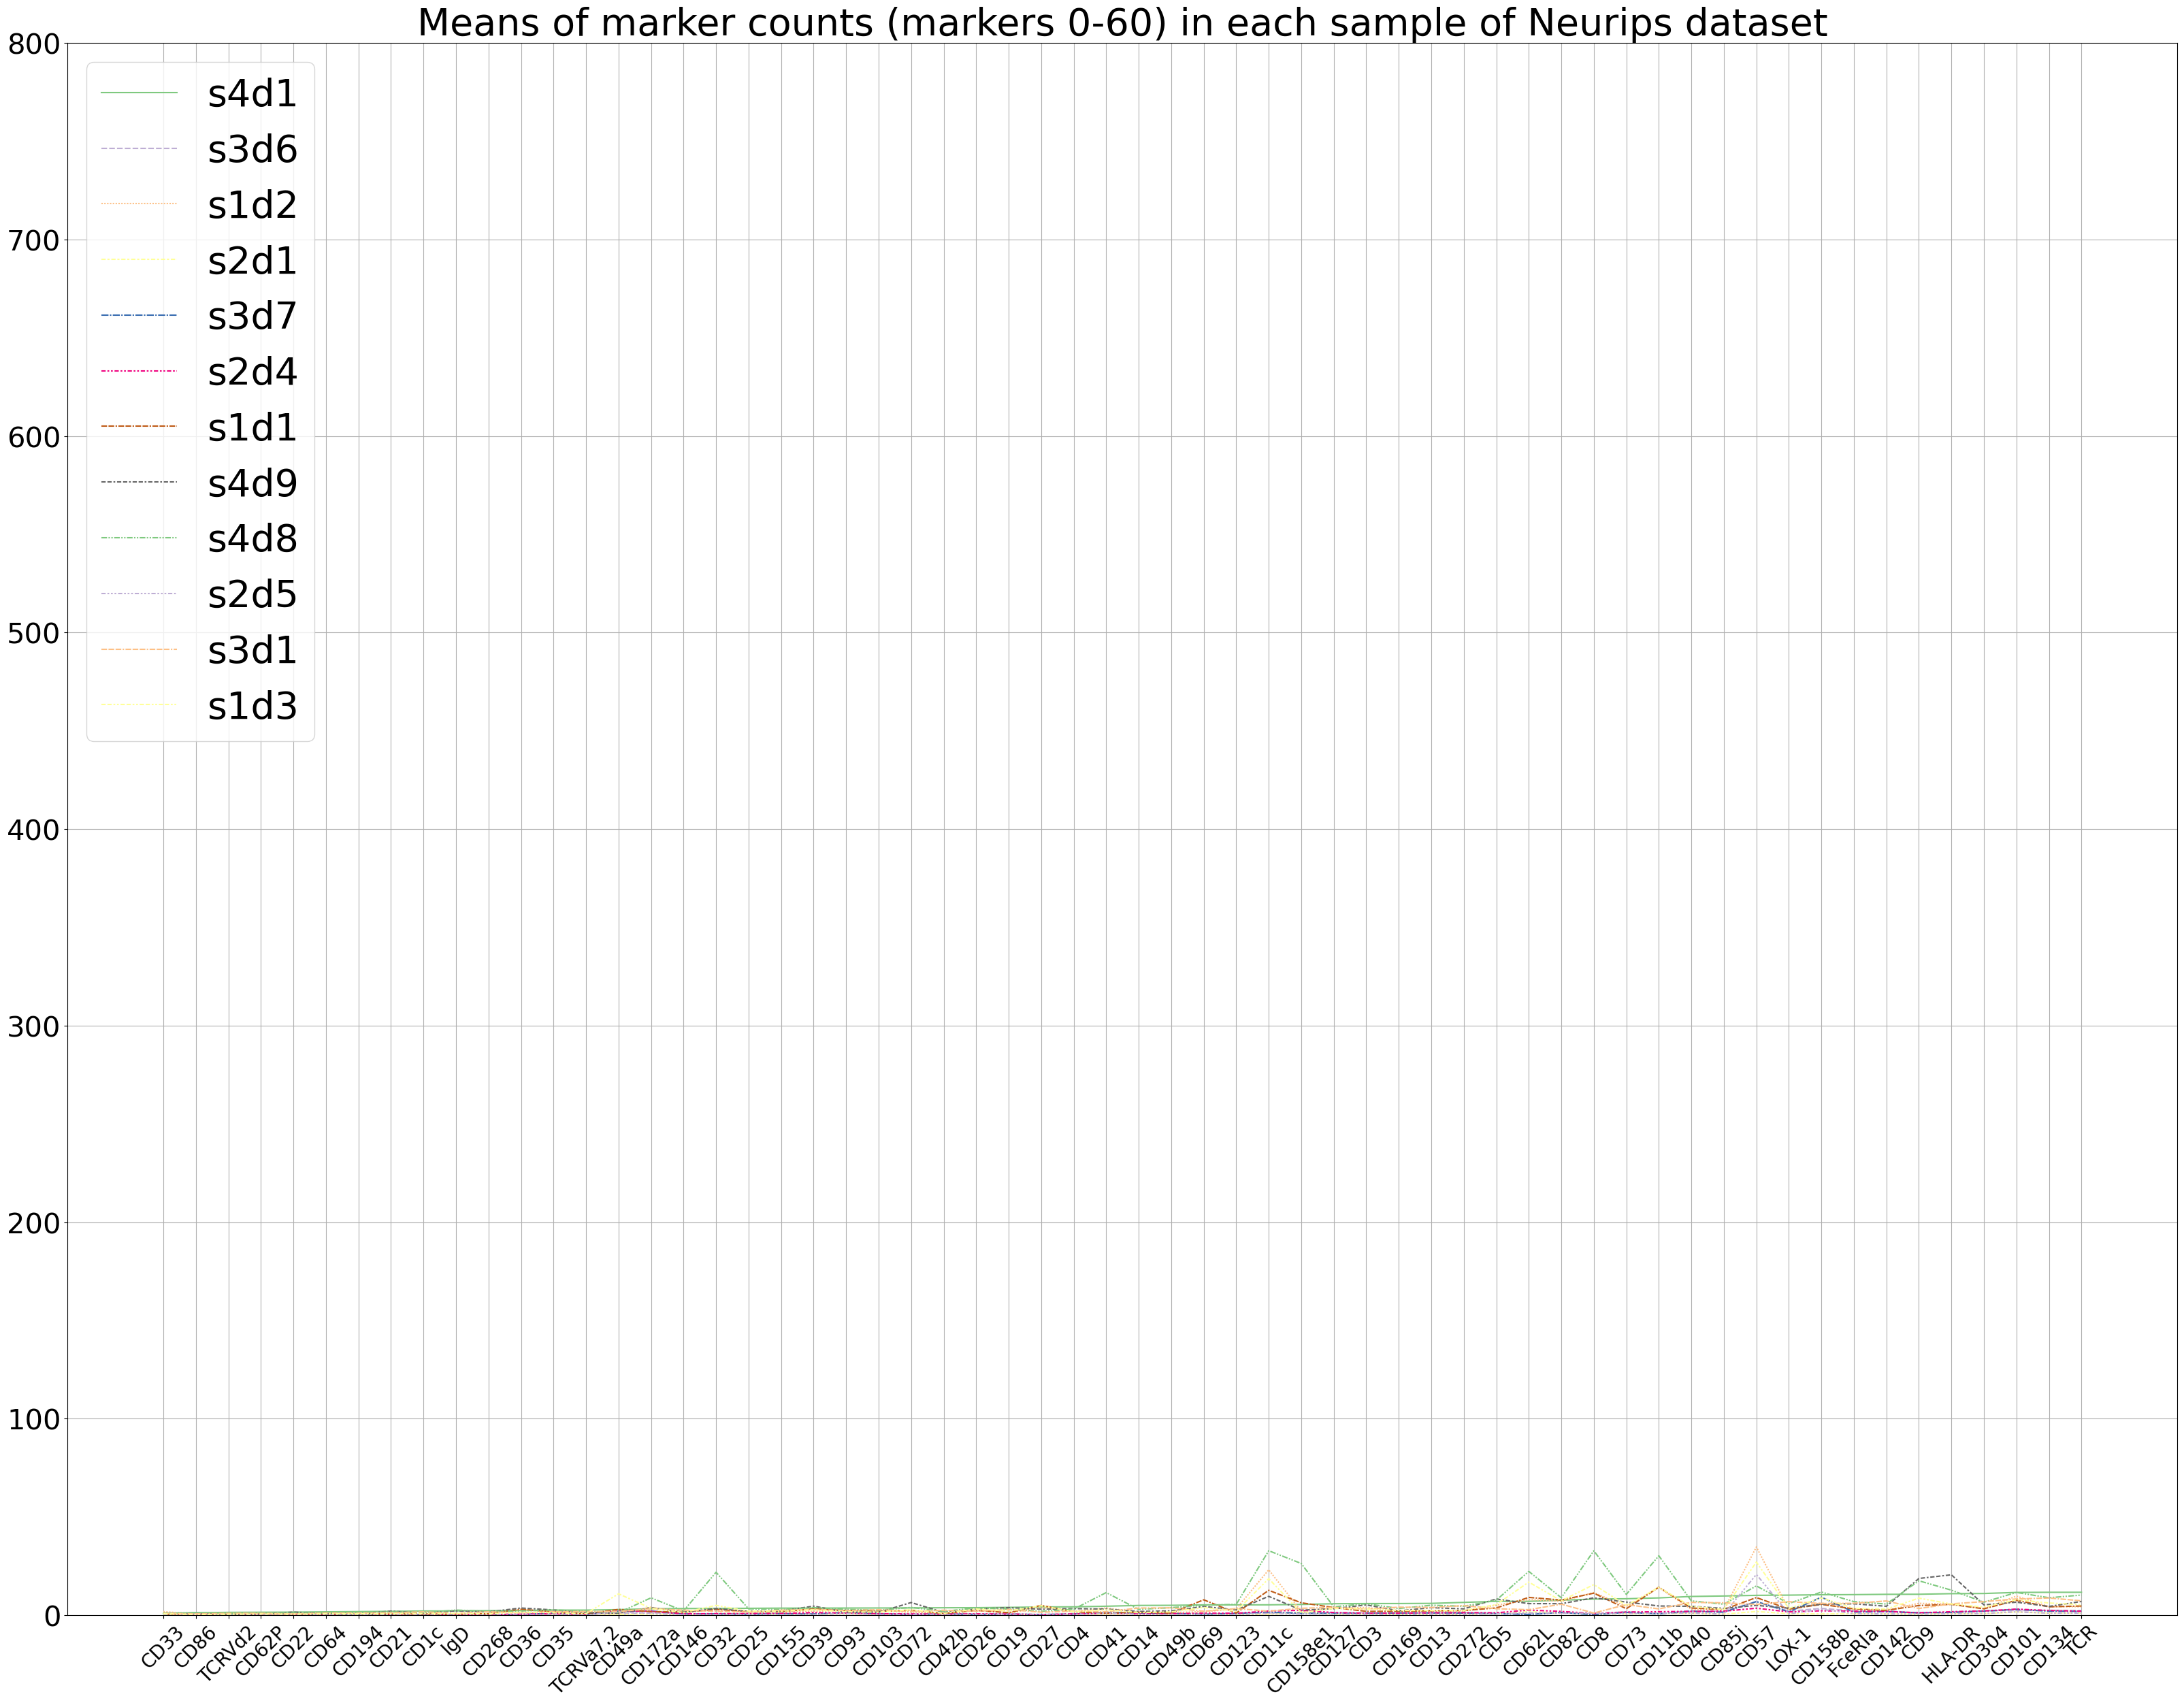

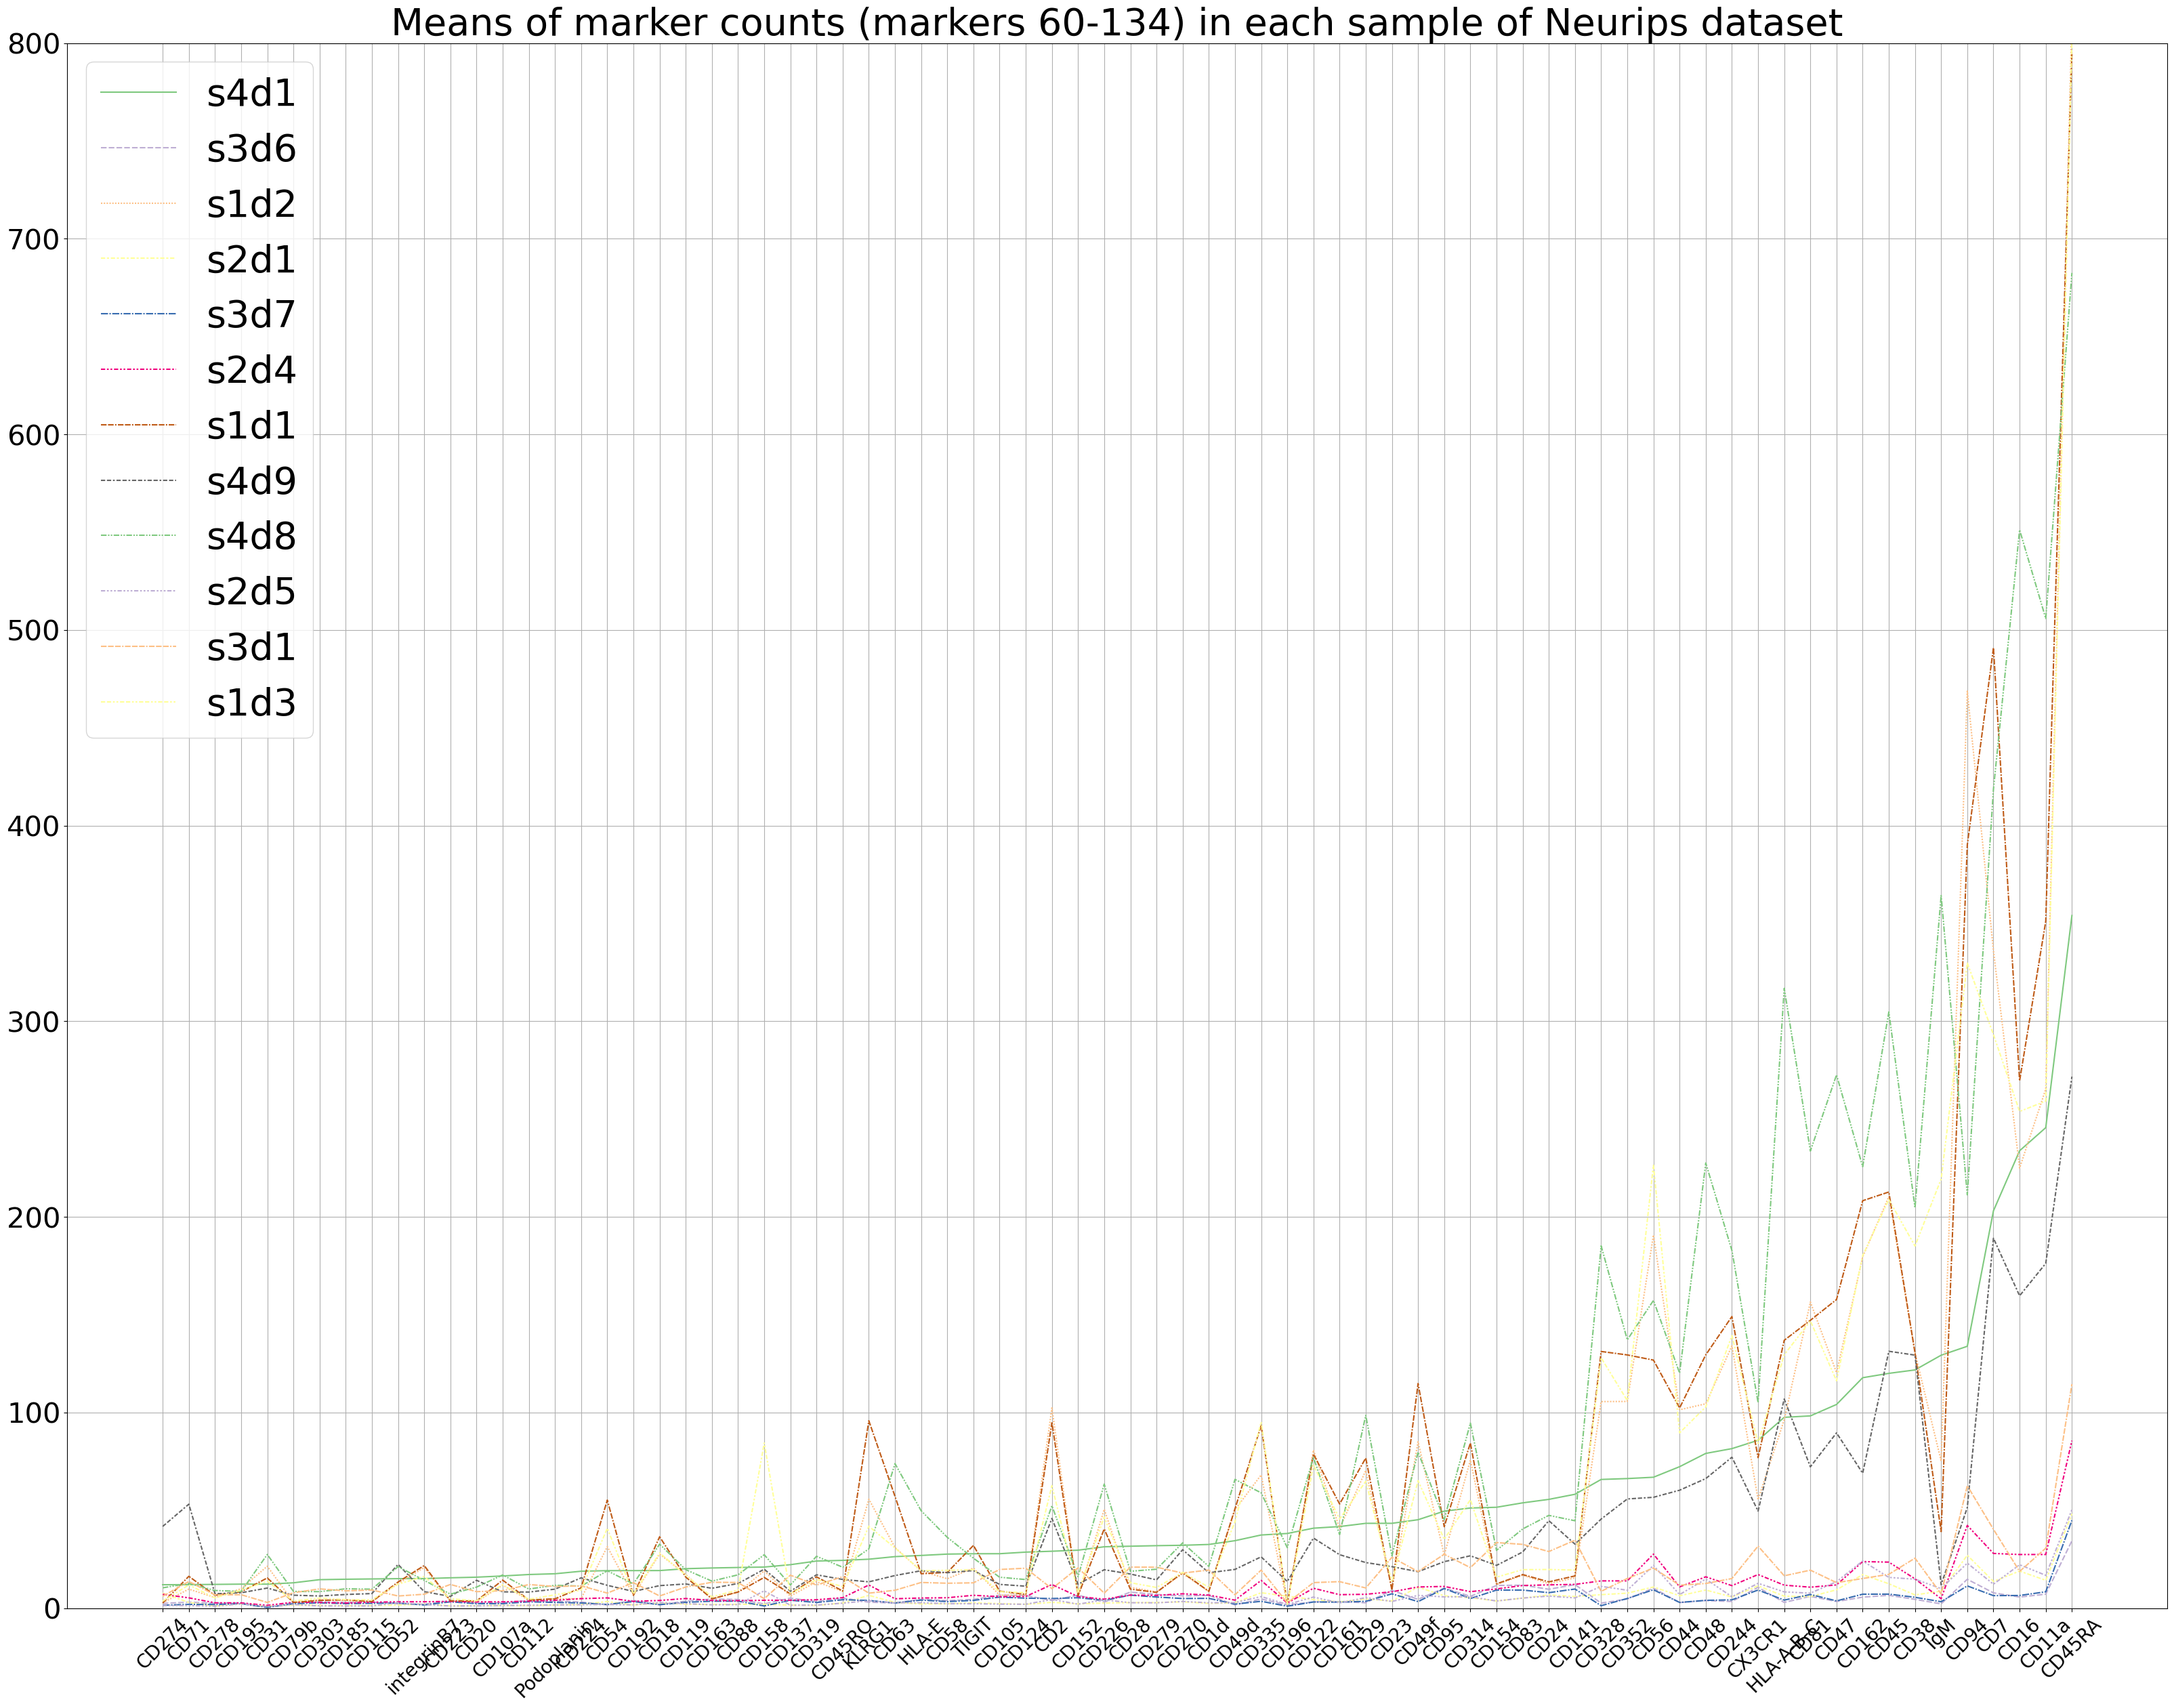

In [66]:
#Only NK-cells from each sample selected

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=df_all.iloc[:60], palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 800)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset", fontsize=40) ;


plt.figure(figsize=[40,30])
b= sns.lineplot(data=df_all.iloc[60:], palette=palette)
b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)a
b.tick_params(axis='y', labelsize=30)
plt.ylim(0, 800)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 60-134) in each sample of Neurips dataset", fontsize=40) ;

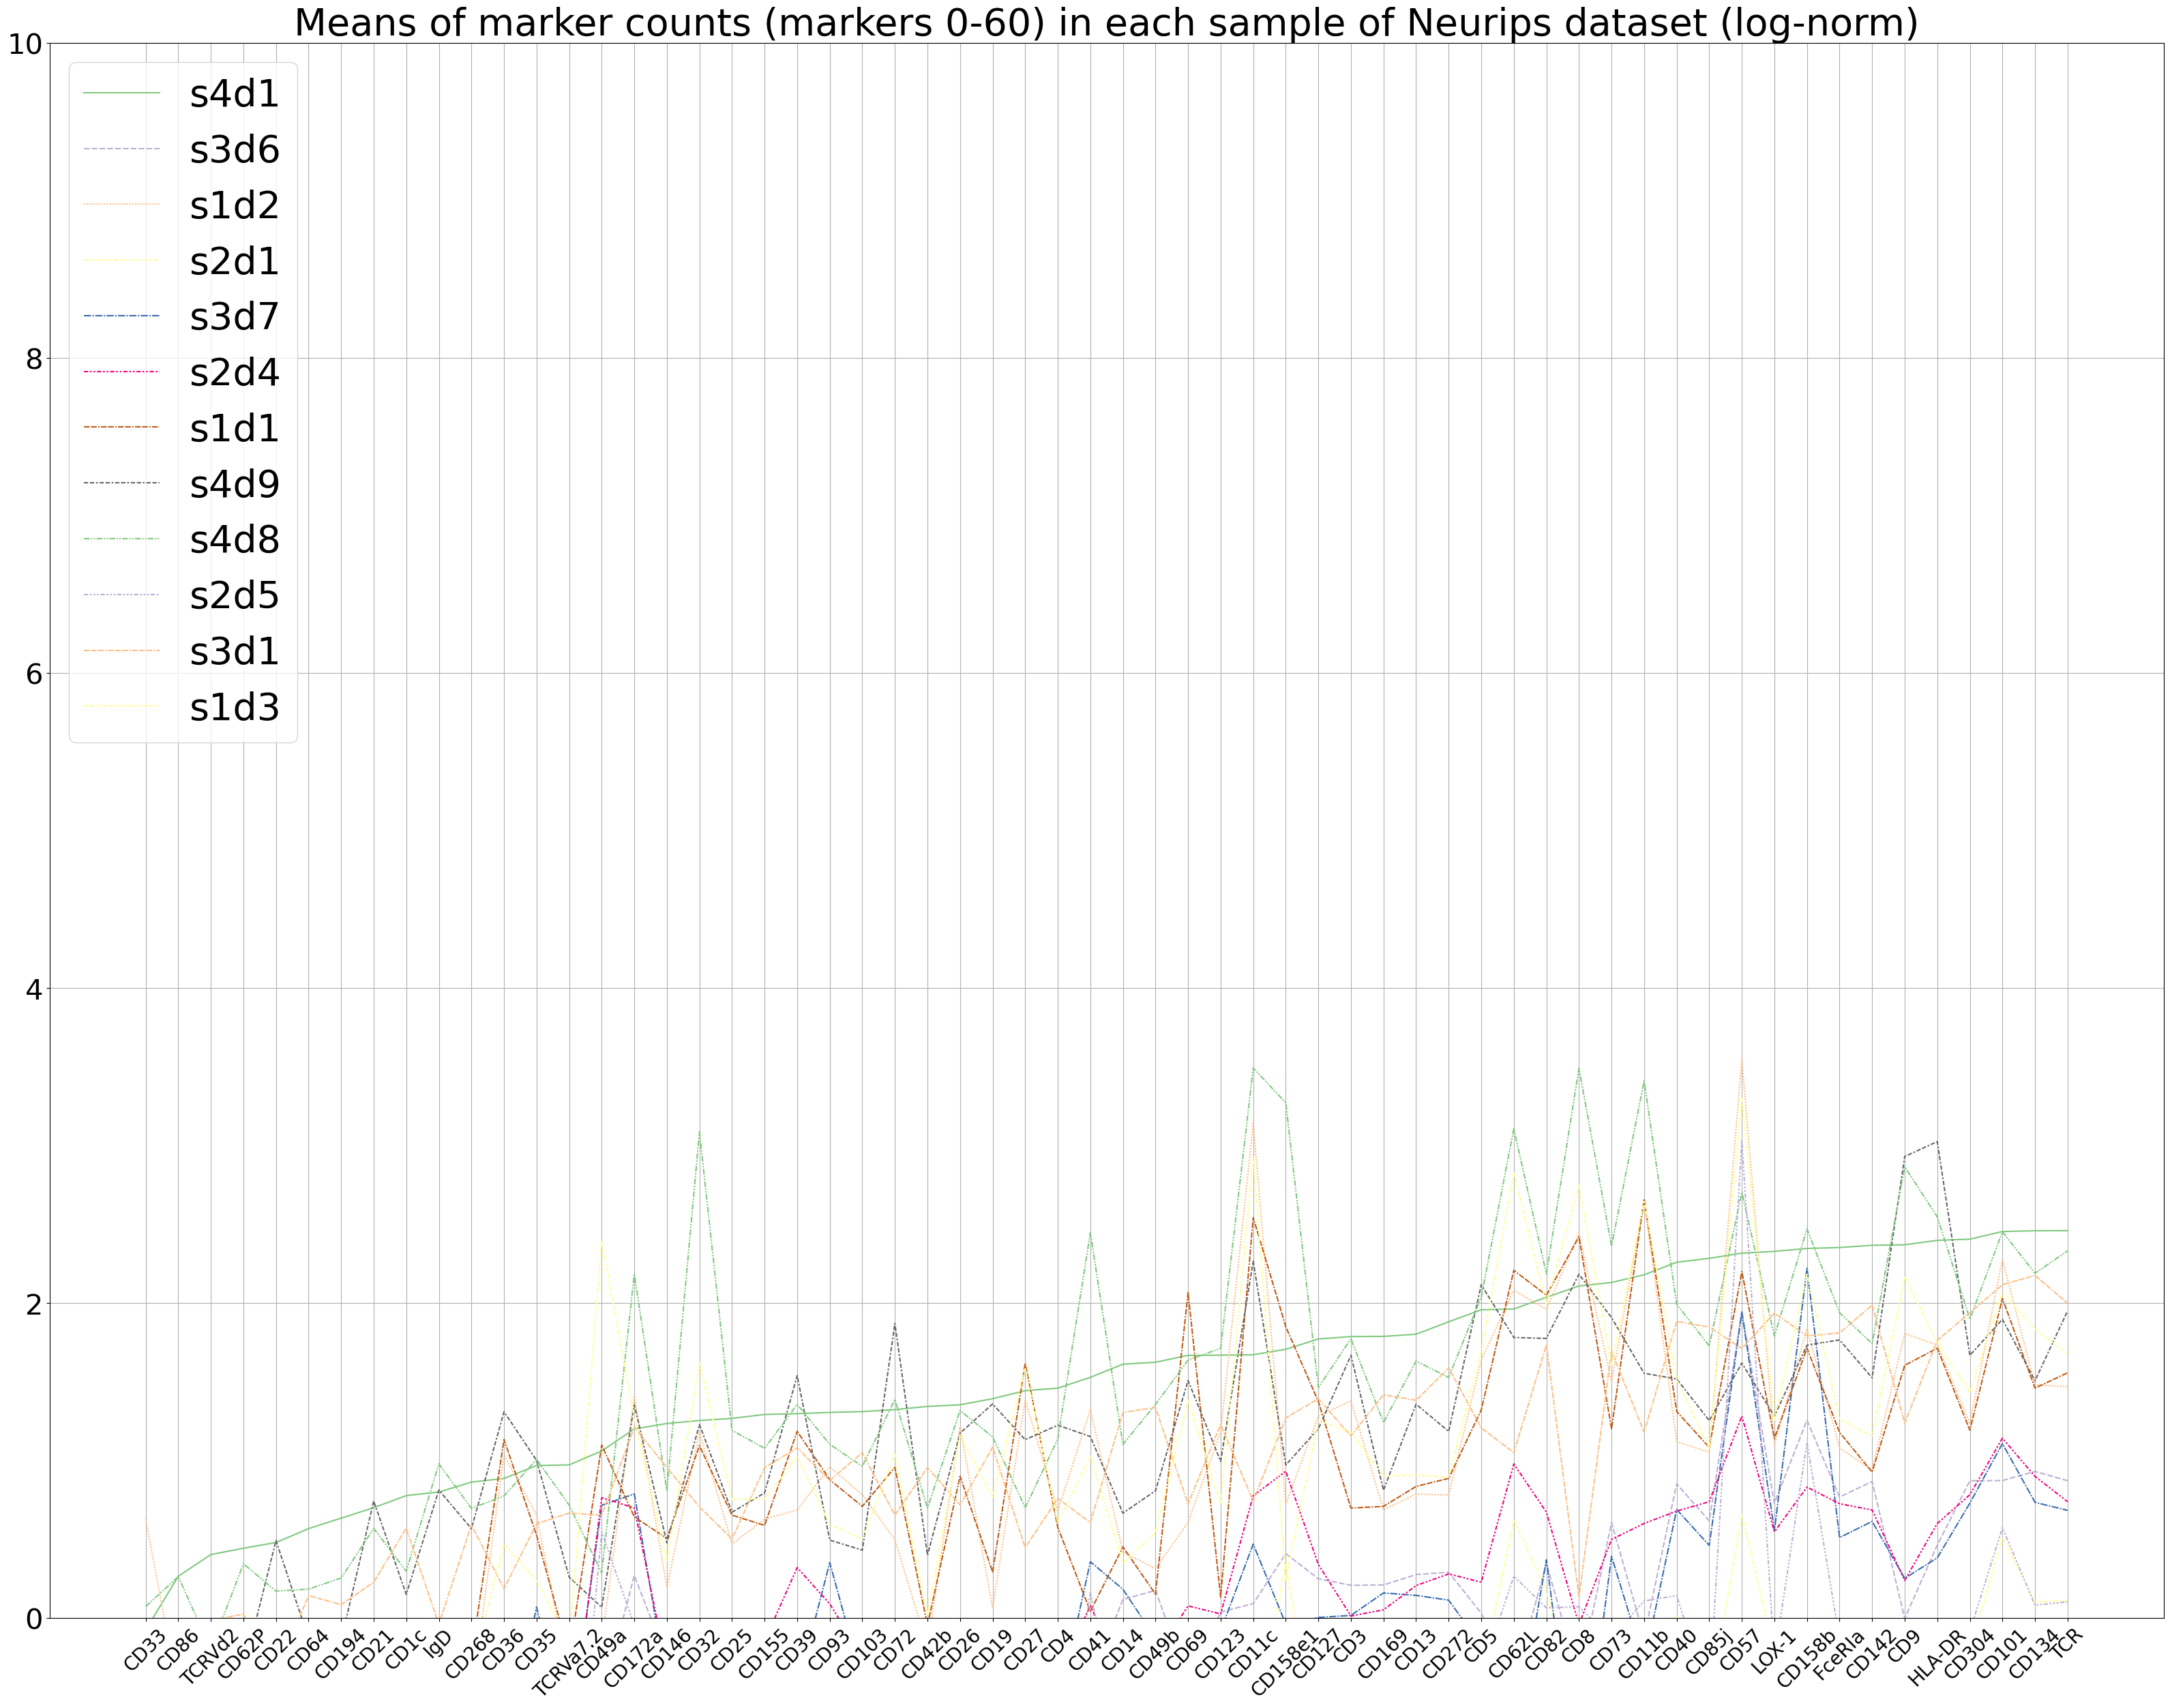

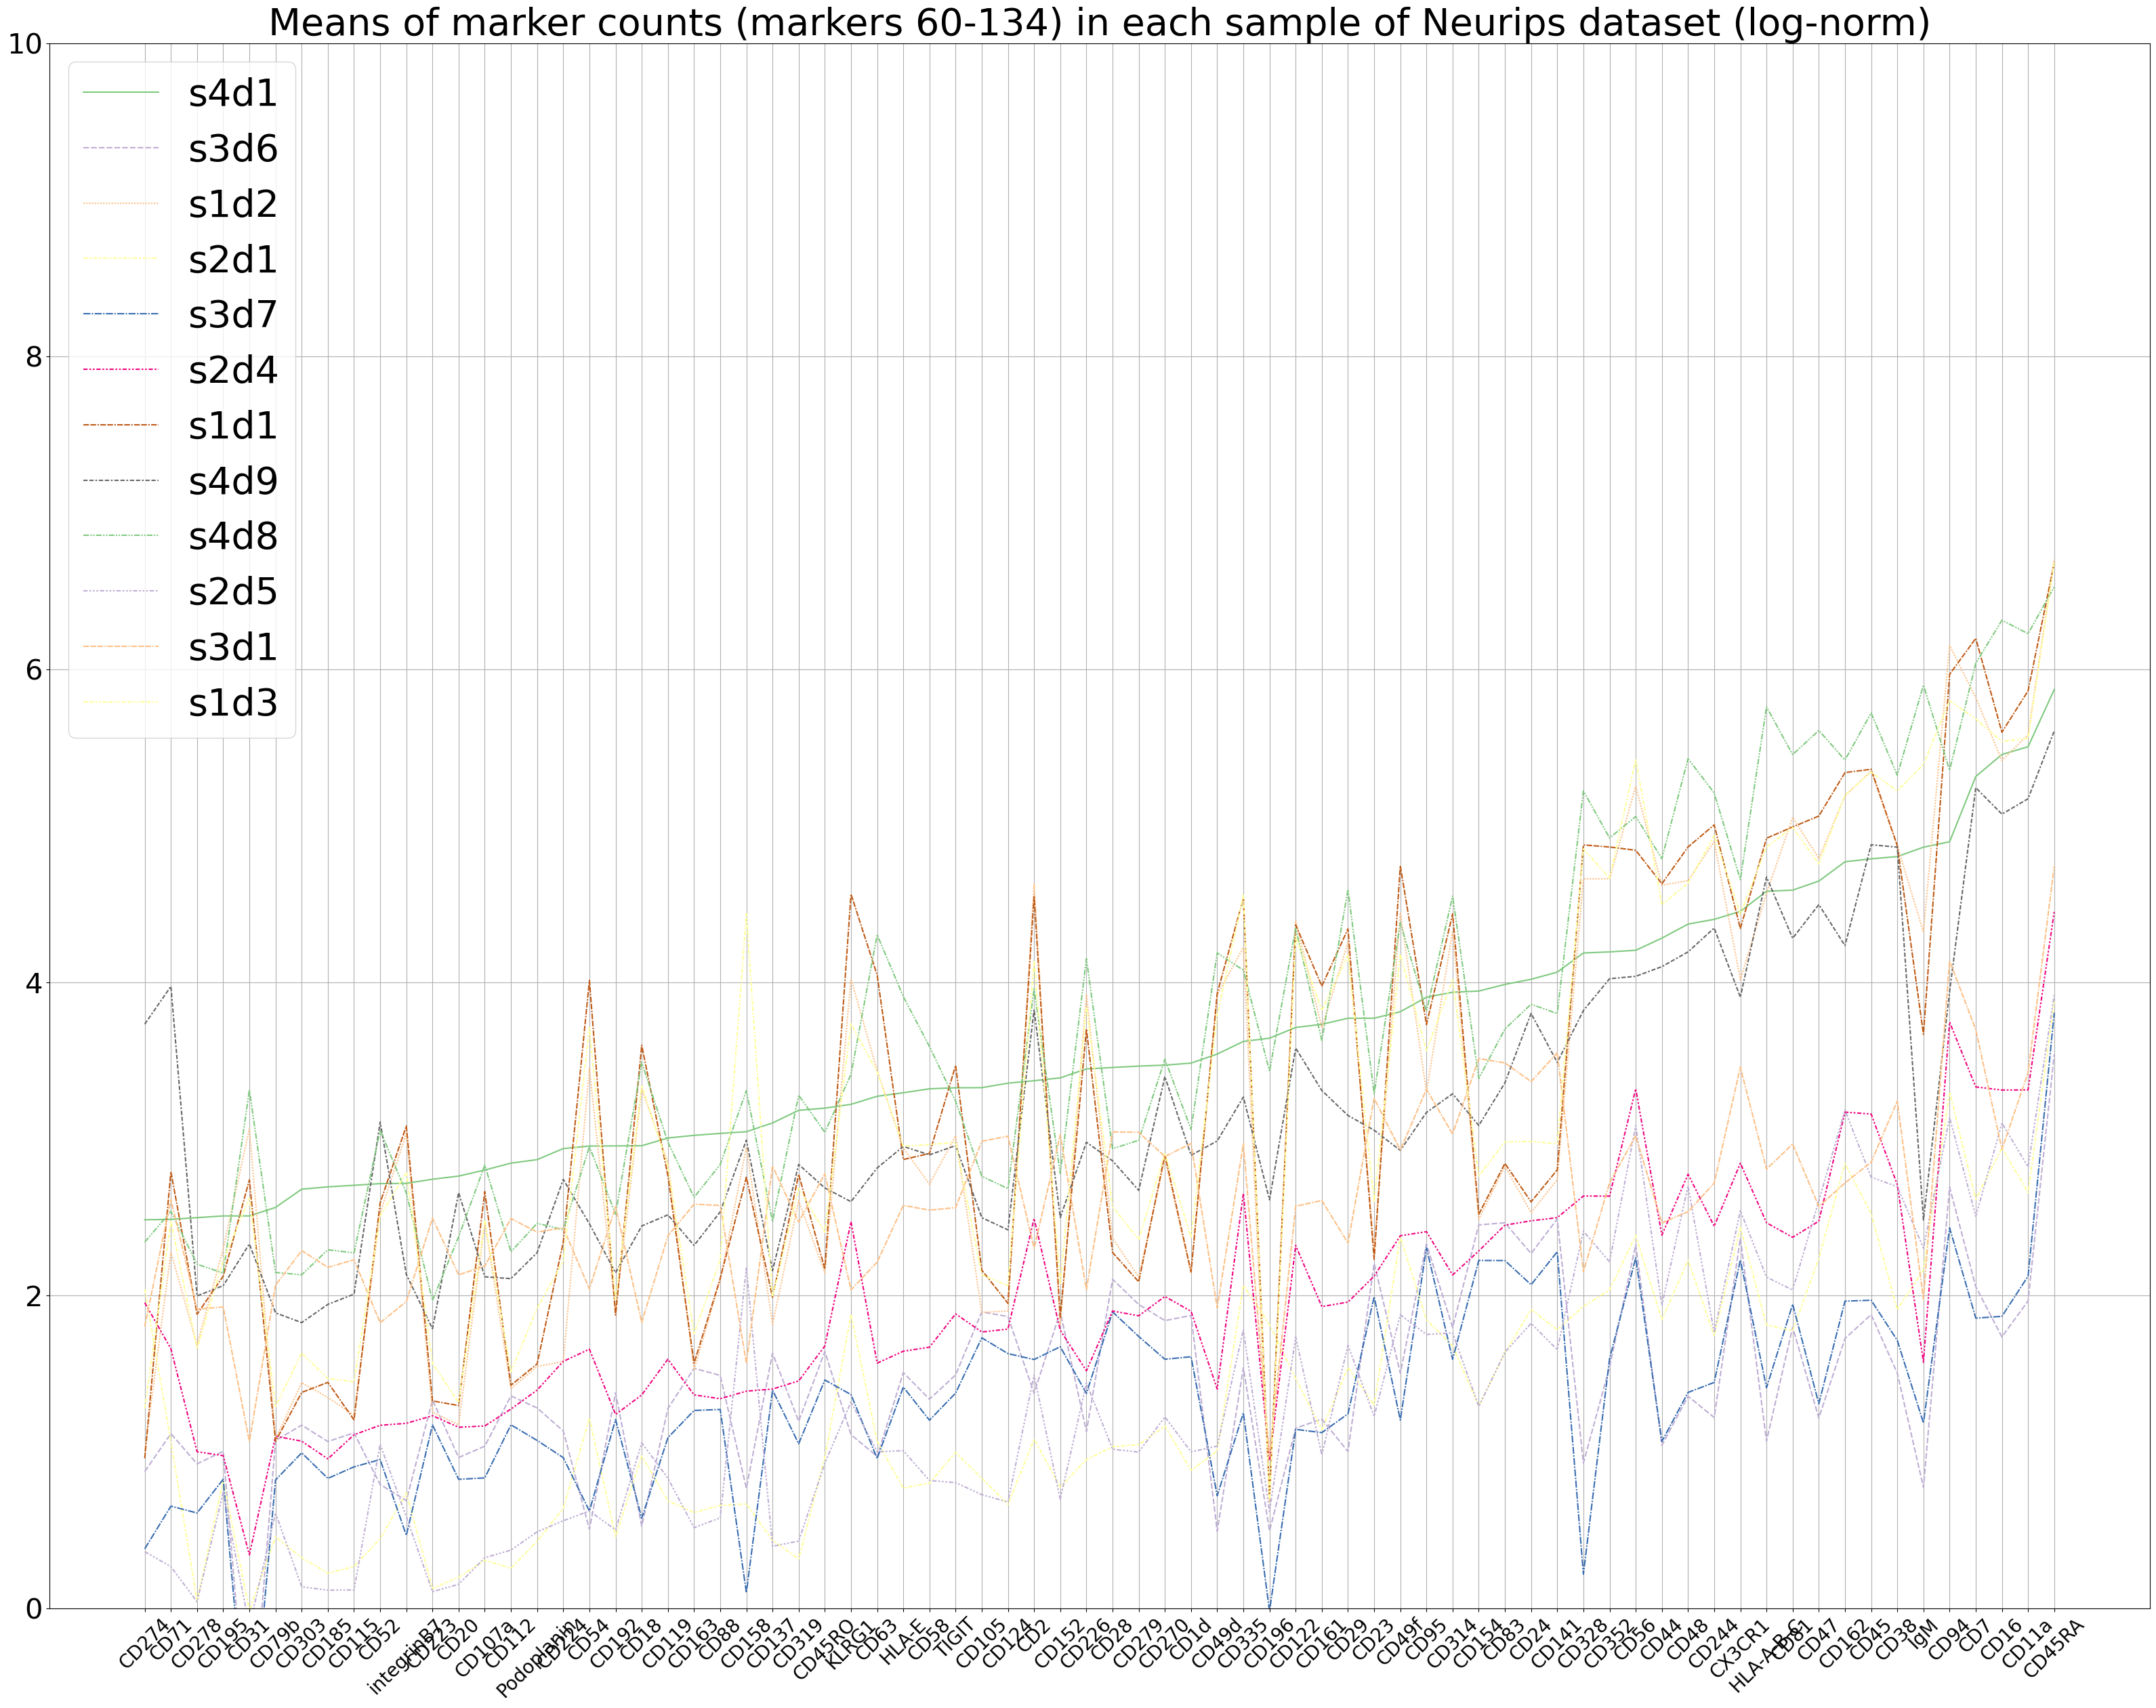

In [69]:
#Only NK-cells from each sample selected, log-normalized

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=np.log(df_all.iloc[:60]), palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 10)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset (log-norm)", fontsize=40) ;


plt.figure(figsize=[40,30])
b= sns.lineplot(data=np.log(df_all.iloc[60:]), palette=palette)
b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
b.tick_params(axis='y', labelsize=30)
plt.ylim(0, 10)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 60-134) in each sample of Neurips dataset (log-norm)", fontsize=40) ;

### Granja

In [87]:
adata_granja=adata[adata.obs['SAMPLE_SET'] == 'Granja' ]

In [88]:
samples=adata_granja.obs['POOL'].unique().tolist()

samples

['GSM4138872', 'GSM4138873', 'GSM4138874', 'GSM4138880', 'GSM4138885']

In [89]:
sample1=adata_granja[adata_granja.obs['POOL'] == 'GSM4138872']
sample2=adata_granja[adata_granja.obs['POOL'] == 'GSM4138873']
sample3=adata_granja[adata_granja.obs['POOL']== 'GSM4138874']
sample4=adata_granja[adata_granja.obs['POOL']== 'GSM4138880']
sample5=adata_granja[adata_granja.obs['POOL']== 'GSM4138885']

In [90]:
sample1=sample1[sample1.obs['cell_type'] == 'NK']
sample2=sample2[sample2.obs['cell_type'] == 'NK']
sample3=sample3[sample3.obs['cell_type'] == 'NK']
sample4=sample4[sample4.obs['cell_type'] == 'NK']
sample5=sample5[sample5.obs['cell_type'] == 'NK']


In [91]:
sample_GSM4138872=sample1.obsm['protein_expression']
sample_GSM4138873=sample2.obsm['protein_expression']
sample_GSM4138874=sample3.obsm['protein_expression']
sample_GSM4138880=sample4.obsm['protein_expression']
sample_GSM4138885=sample5.obsm['protein_expression']

In [92]:
df1=sample_GSM4138872.mean(axis=0).sort_values()
df2=sample_GSM4138873.mean(axis=0).sort_values()
df3=sample_GSM4138874.mean(axis=0).sort_values()
df4=sample_GSM4138880.mean(axis=0).sort_values()
df5=sample_GSM4138885.mean(axis=0).sort_values()

In [93]:
#combining all dataframes

df_all=pd.concat([df1,df2,df3,df4,df5], axis=1)

In [107]:
df_all=df_all.T

df_all

GSM4138872   GSM4138873
CD19      10.703488     7.116279
CD14      20.116279    22.773256
CD25      23.244186    23.122093
CD279     29.366279    26.436047
CD127     30.244186    36.901163
TIGIT     39.738372    43.691860
CD15      40.162791    45.779070
CD45RO    41.465116    42.982558
CD4       61.790698   119.296512
CD3      198.767442   132.360465
CD8      316.906977   351.052326
CD56    1004.616279  1217.034884
CD16    1379.127907  1849.755814
CD45RA  5037.982558  5779.889535

In [96]:
#adding columns names (=sample names)

df_all.columns=['GSM4138872','GSM4138873','GSM4138874', 'GSM4138880', 'GSM4138885']

df_all

GSM4138872   GSM4138873  GSM4138874  GSM4138880  GSM4138885
CD86       0.000000     0.000000         NaN         NaN         NaN
CD71       0.000000     0.000000         NaN         NaN         NaN
CD22       0.000000     0.000000         NaN         NaN         NaN
CD45       0.000000     0.000000         NaN         NaN         NaN
CD38       0.000000     0.000000         NaN         NaN         NaN
...             ...          ...         ...         ...         ...
CD3      198.767442   132.360465         NaN         NaN         NaN
CD8      316.906977   351.052326         NaN         NaN         NaN
CD56    1004.616279  1217.034884         NaN         NaN         NaN
CD16    1379.127907  1849.755814         NaN         NaN         NaN
CD45RA  5037.982558  5779.889535         NaN         NaN         NaN

[141 rows x 5 columns]

In [104]:
#drop rows with only NaNs

df_all.dropna(axis = 0, how = 'all', inplace = True)

In [105]:
df_all = pd.DataFrame(df_all)
df_all != 0
(df_all != 0).any(axis=0)
df_all.loc[:, (df_all != 0).any(axis=0)]
df_all = df_all.loc[:, (df_all != 0).any(axis=0)]

df_all

CD19       CD14       CD25      CD279      CD127      TIGIT  \
GSM4138872  10.703488  20.116279  23.244186  29.366279  30.244186  39.738372   
GSM4138873   7.116279  22.773256  23.122093  26.436047  36.901163  43.691860   

                 CD15     CD45RO         CD4         CD3         CD8  \
GSM4138872  40.162791  41.465116   61.790698  198.767442  316.906977   
GSM4138873  45.779070  42.982558  119.296512  132.360465  351.052326   

                   CD56         CD16       CD45RA  
GSM4138872  1004.616279  1379.127907  5037.982558  
GSM4138873  1217.034884  1849.755814  5779.889535

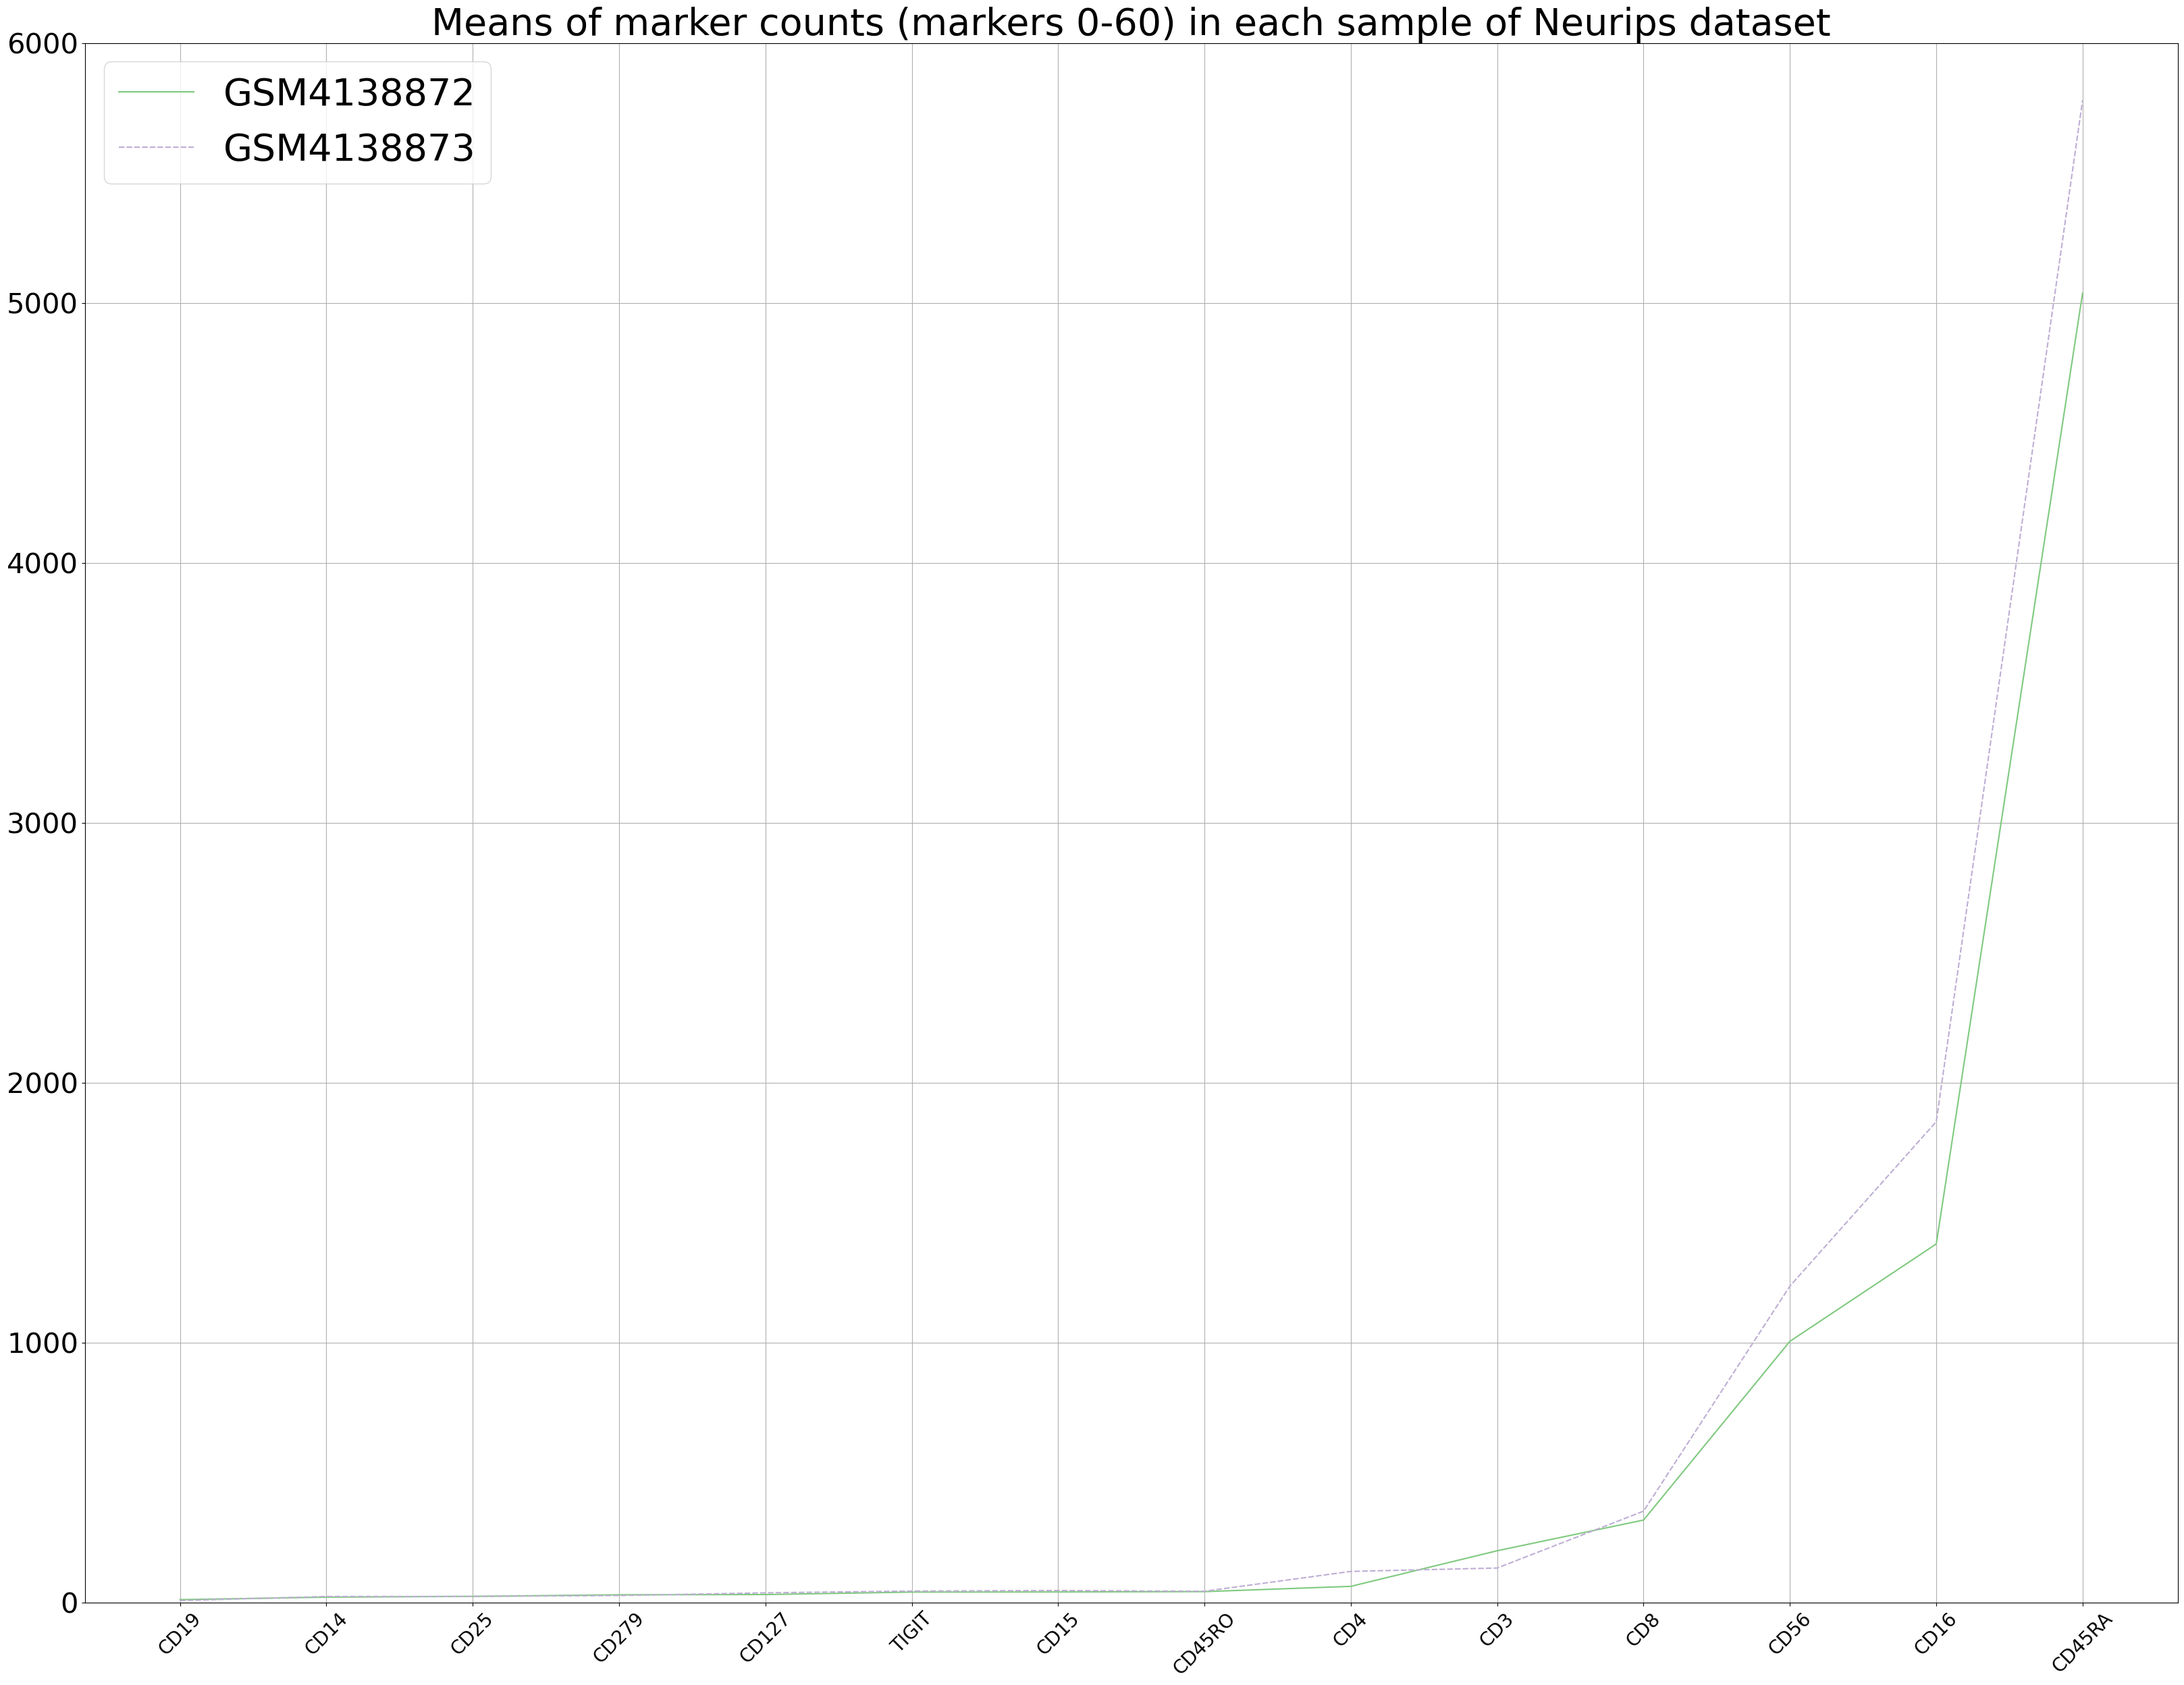

In [108]:
#Only NK-cells from each sample selected

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=df_all, palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 6000)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset", fontsize=40) ;



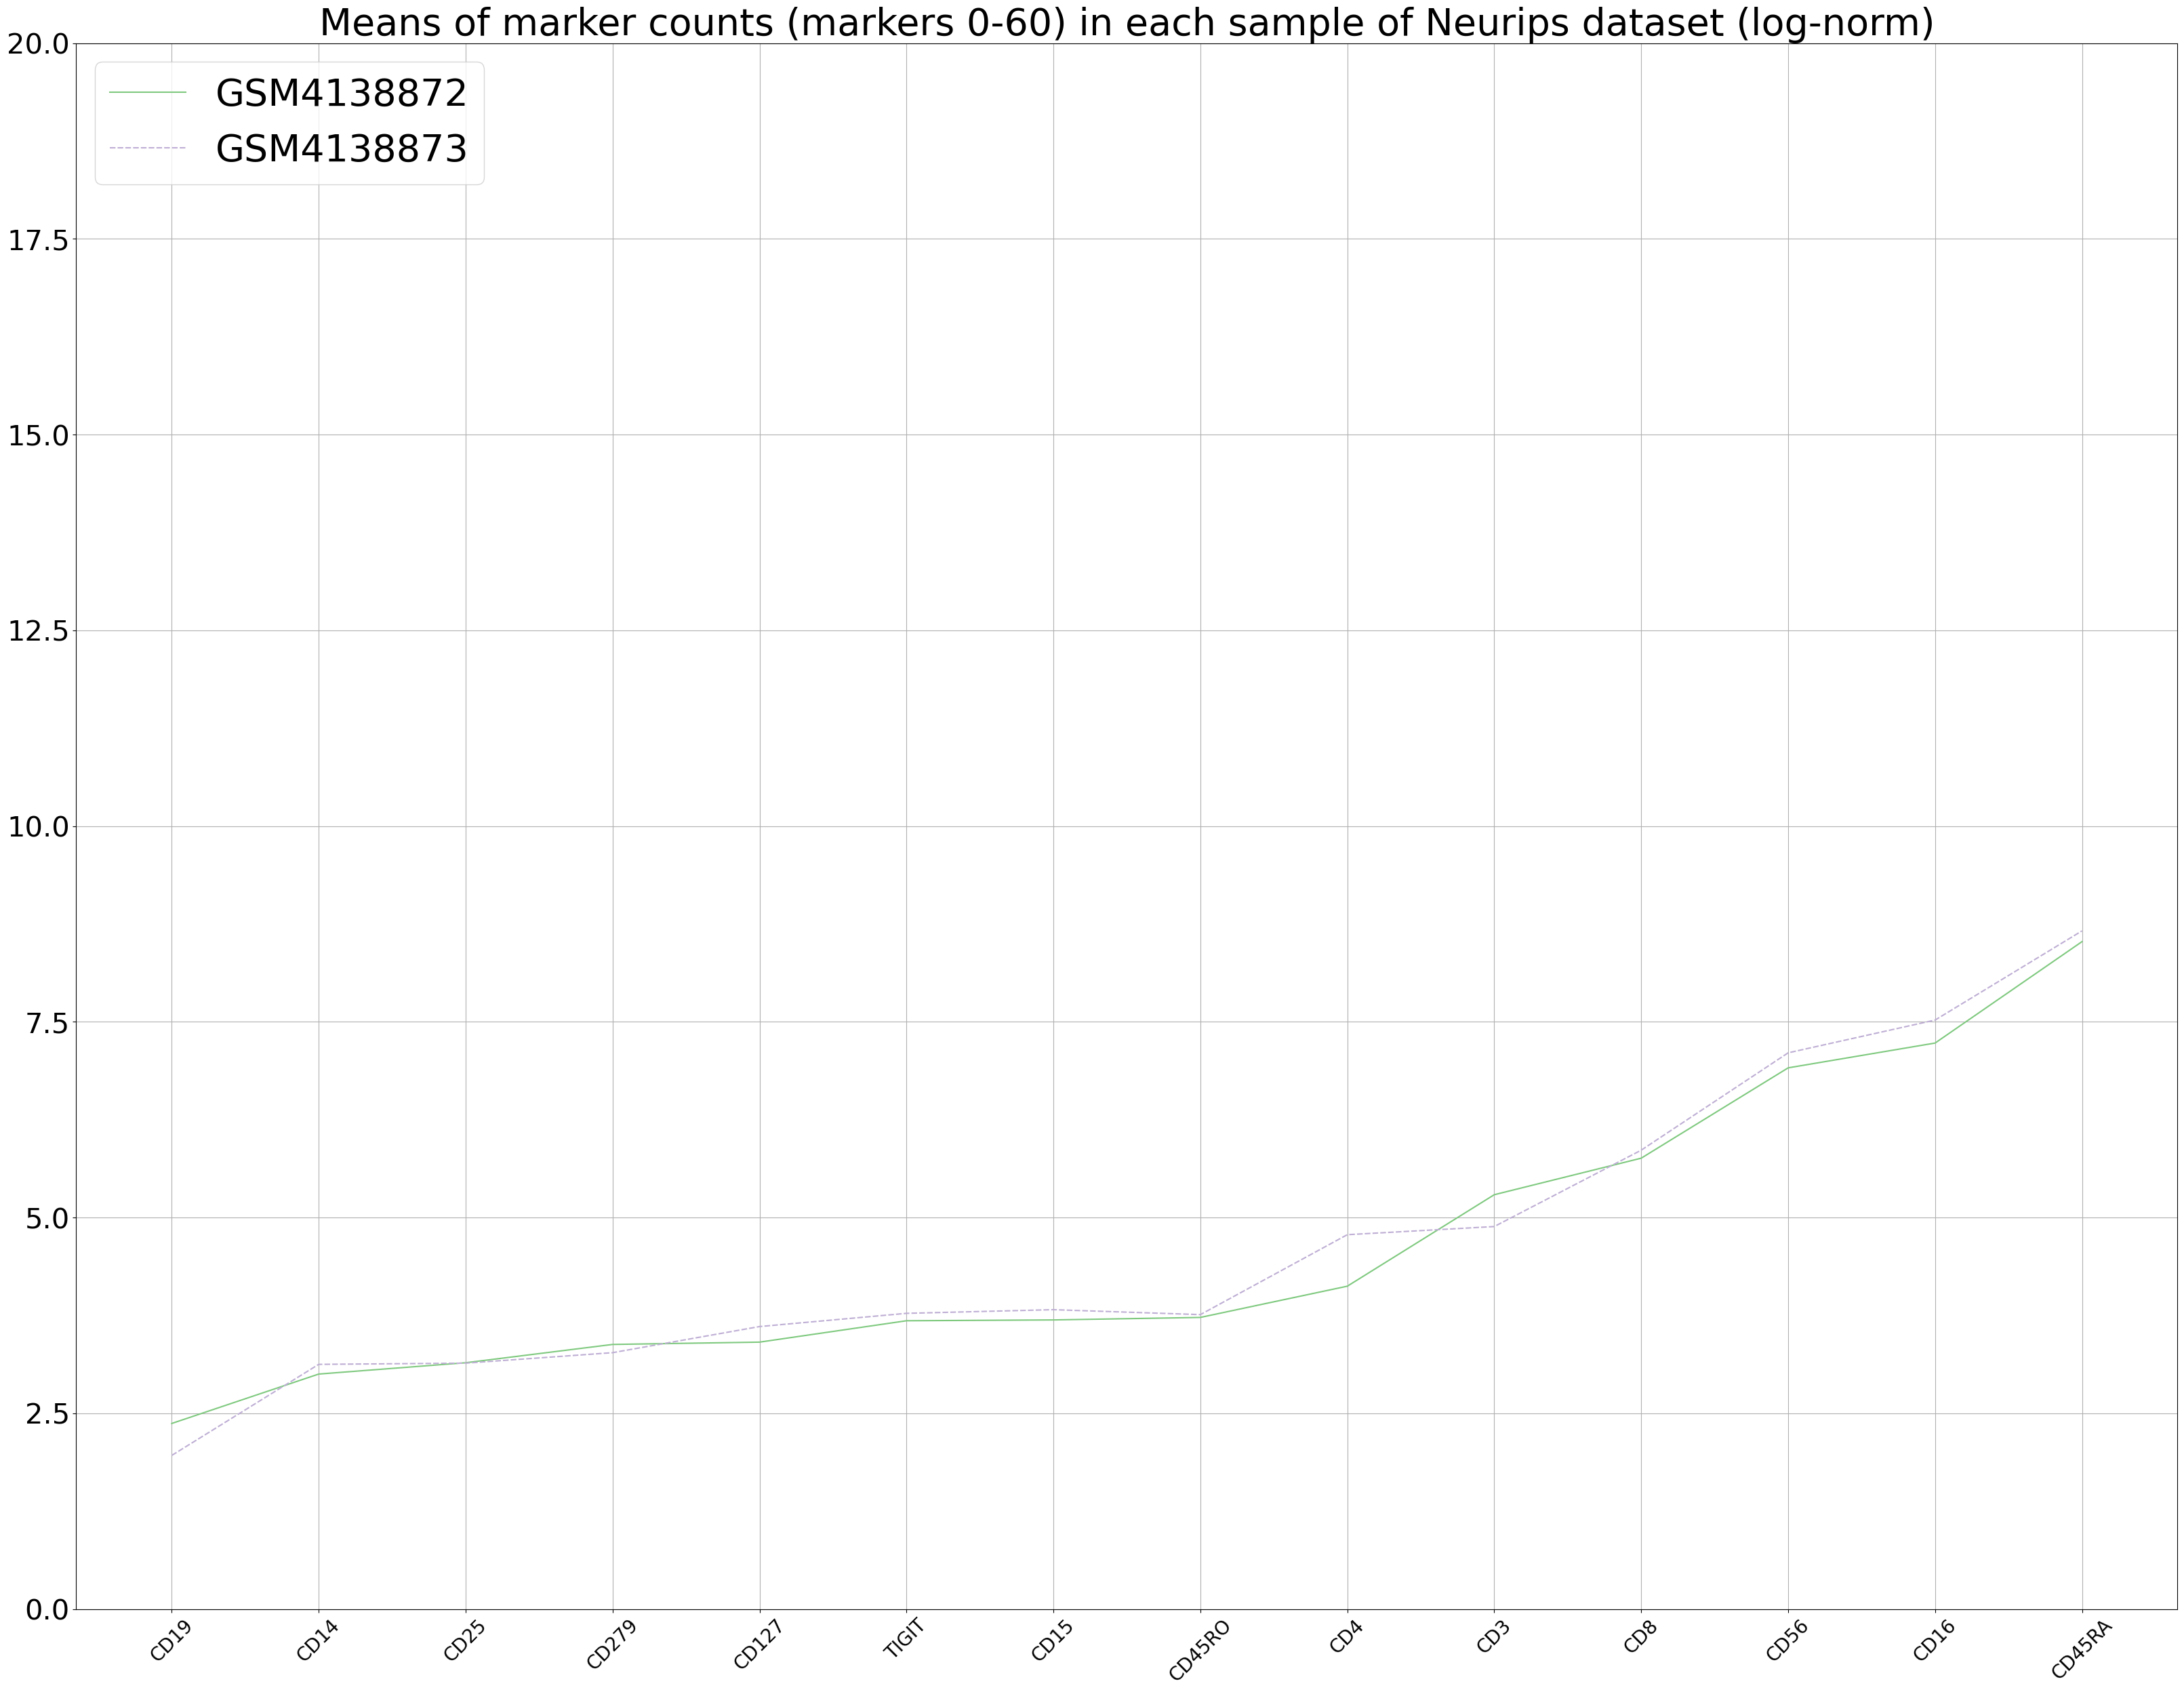

In [110]:
#Only NK-cells from each sample selected, log-normalized

palette = sns.color_palette("Accent")


plt.figure(figsize=[40,30])
a= sns.lineplot(data=np.log(df_all), palette=palette)
a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=30)
plt.ylim(0, 20)
plt.legend(loc='upper left', fontsize = 40)
plt.grid()
plt.title("Means of marker counts (markers 0-60) in each sample of Neurips dataset (log-norm)", fontsize=40) ;


### Easigenomics

In [111]:
adata_easi=adata[adata.obs['batch_group'] == 'Easi' ]

In [112]:
samples = adata_easi.obs['eg_code'].unique().tolist()
samples

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [113]:
#save column names
proteins=adata.obsm['protein_expression'].columns

In [114]:
#save means of protein counts/each protein/each sample into a list

list_samples= []

for sample in samples:
    eg=adata_easi[adata_easi.obs['cell_type'] == 'NK']
    eg=adata_easi[adata_easi.obs['eg_code'] == sample]
    prot=eg.obsm['protein_expression']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples.append(prot_mean)

    

In [115]:
list_samples

[CD86        0.000000
 CD22        0.000000
 CD28        0.000000
 CD18        0.000000
 IgD         0.000000
              ...    
 CD7        57.807130
 HLA-DR     67.666819
 CD45      108.556673
 CD2       148.609689
 CD44      364.187843
 Length: 141, dtype: float64,
 CD86       0.000000
 CD22       0.000000
 CD28       0.000000
 CD18       0.000000
 IgD        0.000000
             ...    
 HLA-DR    25.330396
 CD34      28.616740
 CD45      30.616740
 CD117     51.919236
 CD44      95.715125
 Length: 141, dtype: float64,
 CD86        0.000000
 CD22        0.000000
 CD28        0.000000
 CD18        0.000000
 IgD         0.000000
              ...    
 CD11c      92.350251
 HLA-DR     92.416080
 CD2        94.780402
 CD11b      98.874623
 CD44      539.432663
 Length: 141, dtype: float64,
 CD86        0.000000
 CD22        0.000000
 CD28        0.000000
 CD18        0.000000
 IgD         0.000000
              ...    
 HLA-DR     30.739505
 CD58       31.079377
 CD33       33.5374

In [116]:
#creating a dataframe from list of lists

df = pd.DataFrame(list_samples, columns = proteins)

df

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  ...  \
0    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
1    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
2    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
3    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
4    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
5    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
6    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
7    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
9    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
10   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
11   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
12   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
13   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
14   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
15   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
16   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
17   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
18   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
19   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
20   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
21   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
22   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
23   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
24   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
25   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
26   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
27   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
28   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
29   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
30   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
31   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
32   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
33   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
34   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
35   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
36   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
37   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
38   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
39   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
40   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
41   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
42   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
43   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
44   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
45   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
46   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
47   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
48   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
49   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
50   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
51   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0

In [117]:
df=df.T

df

0          1          2          3          4          5   \
CD86      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD274     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD270     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD155     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD112     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...            ...        ...        ...        ...        ...        ...   
CD10     17.835923  24.516887  13.256281  20.193401  25.665406  31.208766   
CD90      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD15     45.230347  22.212922  25.310804  23.646196  26.787020  51.486736   
CD117    11.039305  51.919236   5.566332  44.226948  36.029616  49.859285   
CD66ace  25.171389   7.920705  11.340704   8.818332   3.195337  19.748558   

                 6          7          8          9   ...         49  \
CD86       0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD274      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD270      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD155      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD112      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
...             ...        ...        ...        ...  ...        ...   
CD10     482.000000  23.413094  13.193694  23.351145  ...  20.355525   
CD90       0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD15      23.285714  64.183956  20.344595  30.244275  ...  25.026424   
CD117      5.142857  13.587828  28.083333  13.778626  ...  13.635209   
CD66ace    9.914286  19.535270   9.209459   3.175573  ...  12.727522   

                50         51         52          53         54          55  \
CD86      0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD274     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD270     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD155     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD112     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
...            ...        ...        ...         ...        ...         ...   
CD10     11.922512  33.346493  26.859020  523.375102  10.680851   17.156142   
CD90      0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD15     15.473614  41.226295   8.967742    8.077259  18.691489   61.583267   
CD117     9.847027  37.679591  16.663082    9.048321   9.617021  138.709566   
CD66ace   9.287909  22.775115   5.893668    3.859678  10.925532   14.048761   

                56         57          58  
CD86      0.000000   0.000000    0.000000  
CD274     0.000000   0.000000    0.000000  
CD270     0.000000   0.000000    0.000000  
CD155     0.000000   0.000000    0.000000  
CD112     0.000000   0.000000    0.000000  
...            ...        ...         ...  
CD10     17.603387  13.533304  989.278822  
CD90      0.000000   0.000000    0.000000  
CD15      6.987297  66.317370   14.218672  
CD117    13.048694  75.934697    5.573308  
CD66ace   4.870148  11.953418    6.802005  

[141 rows x 59 columns]

In [118]:
#add column names

df.columns=samples

df

EG35       EG38       EG58       EG39        EG4       EG48  \
CD86      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD274     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD270     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD155     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD112     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...            ...        ...        ...        ...        ...        ...   
CD10     17.835923  24.516887  13.256281  20.193401  25.665406  31.208766   
CD90      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CD15     45.230347  22.212922  25.310804  23.646196  26.787020  51.486736   
CD117    11.039305  51.919236   5.566332  44.226948  36.029616  49.859285   
CD66ace  25.171389   7.920705  11.340704   8.818332   3.195337  19.748558   

               EG23       EG36       EG61        EG3  ...       EG30  \
CD86       0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD274      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD270      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD155      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD112      0.000000   0.000000   0.000000   0.000000  ...   0.000000   
...             ...        ...        ...        ...  ...        ...   
CD10     482.000000  23.413094  13.193694  23.351145  ...  20.355525   
CD90       0.000000   0.000000   0.000000   0.000000  ...   0.000000   
CD15      23.285714  64.183956  20.344595  30.244275  ...  25.026424   
CD117      5.142857  13.587828  28.083333  13.778626  ...  13.635209   
CD66ace    9.914286  19.535270   9.209459   3.175573  ...  12.727522   

              EG60       EG44       EG27        EG22       EG54        EG45  \
CD86      0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD274     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD270     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD155     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD112     0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
...            ...        ...        ...         ...        ...         ...   
CD10     11.922512  33.346493  26.859020  523.375102  10.680851   17.156142   
CD90      0.000000   0.000000   0.000000    0.000000   0.000000    0.000000   
CD15     15.473614  41.226295   8.967742    8.077259  18.691489   61.583267   
CD117     9.847027  37.679591  16.663082    9.048321   9.617021  138.709566   
CD66ace   9.287909  22.775115   5.893668    3.859678  10.925532   14.048761   

               EG5       EG50        EG25  
CD86      0.000000   0.000000    0.000000  
CD274     0.000000   0.000000    0.000000  
CD270     0.000000   0.000000    0.000000  
CD155     0.000000   0.000000    0.000000  
CD112     0.000000   0.000000    0.000000  
...            ...        ...         ...  
CD10     17.603387  13.533304  989.278822  
CD90      0.000000   0.000000    0.000000  
CD15      6.987297  66.317370   14.218672  
CD117    13.048694  75.934697    5.573308  
CD66ace   4.870148  11.953418    6.802005  

[141 rows x 59 columns]

In [119]:
df=df.T

df

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  ...  \
EG35   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG38   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG58   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG39   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG4    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG48   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG23   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG36   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG61   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG3    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG12   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG46   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG9    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG43   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG56   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG42   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG49   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG37   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG57   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG24   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG11   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG14   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG55   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG28   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG52   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG33   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG10   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG32   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG59   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG16   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG63   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG15   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG21   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG26   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG13   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG53   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG51   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG2    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG40   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG62   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG31   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG7    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG29   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG41   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG47   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG1    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG6    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG34   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG30   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   
EG60   0.0    0.0    0.0    

In [120]:
#remove columns that contain only zeros

df = pd.DataFrame(df)
df != 0
(df != 0).any(axis=0)
df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 0).any(axis=0)]

df

CD3         CD8       CD56        CD19        CD33       CD11c  \
EG35  18.578611   43.312157  22.443784   16.783821   24.679616   51.629799   
EG38  14.562408    7.562408  12.057269   13.621145    7.303965    8.571219   
EG58   5.847236   18.293467  18.602010    7.913065   58.515075   92.350251   
EG39  14.927773   11.250779  13.330522   13.129423   33.537489   10.302841   
EG4   11.738500    9.575299  18.284184   12.452426   21.395085   13.327662   
EG48  11.963091   11.904844  21.378316   25.118224   30.311995  148.779700   
EG23  17.971429   18.771429  14.371429   17.971429   28.342857   34.200000   
EG36  27.595205  129.548179  29.053481   15.448594   21.774550   42.950207   
EG61   6.790541   16.488739  16.567568    9.454955   37.936937   56.056306   
EG3   15.687023   41.709924  16.816794    4.167939    8.793893    5.847328   
EG12  10.497122   64.544819  12.560444   48.441817   23.606291   43.002467   
EG46   3.608527    4.637597   8.037791    4.549419    4.115795    6.519380   
EG9    3.159892    8.240289   8.438121  159.672087   11.202349    6.467028   
EG43   4.563860    7.917043  38.324435    3.986037    3.137988    7.319507   
EG56   4.286208    8.129152  11.700771    7.079724    6.670476   10.436620   
EG42   2.579571    3.432597   8.764329    3.656420    2.483830    6.317643   
EG49  12.726196   15.385126  18.166272   19.218380  105.843202   68.878257   
EG37  10.748252   23.468531  24.958042   15.671329   17.314685   29.251748   
EG57  11.958411   68.539417  20.460583    8.011794   26.298572   59.963377   
EG24  13.516401   10.108716   7.493908   28.373008    3.682287    6.313964   
EG11   2.381250   11.864583   8.468750   93.825000    4.652083    9.662500   
EG14   1.512528    7.899203  11.984055   13.617882    1.828588    2.911731   
EG55   5.319325   12.078158  12.133030    7.415953    8.309957   12.682013   
EG28  12.967791   20.881902  23.078988   15.497699    8.172546   16.024540   
EG52  13.580838   24.126946  23.361078   20.749102   24.848503   65.487425   
EG33   5.475148    8.404814  23.261332   11.916536   10.535480   16.710847   
EG10  16.092782  108.036570  16.566592   41.580485   12.791760   23.592622   
EG32   5.978454    9.780735  24.020279   12.231939   11.352345   16.637516   
EG59   5.683036   10.353175  19.602183    8.668155    9.356151   14.924603   
EG16   2.480707    8.206592  16.853698   14.085611    1.164389    4.512862   
EG63   6.398745   11.851112  56.434683    9.049059  127.540217  171.533371   
EG15   1.630137    3.801370  15.993151   22.654110    2.058219    3.003425   
EG21   1.769841    5.789891   4.690894   23.332916    2.484127    5.520468   
EG26   8.643840   46.411200  56.354880   12.192960   32.916480   30.147200   
EG13   1.707692    6.250888  11.926627   19.050888    1.597633    2.484024   
EG53  11.363535   18.455630  23.651380   21.801268   20.029083   39.386279   
EG51   7.040966   23.978291  60.661415   63.238095   18.591387   22.123249   
EG2   16.293055    8.195370  12.585545   17.175042   19.971203   15.440429   
EG40   5.089472   12.757148  10.882610    4.903128   15.454087   13.664312   
EG62   6.786713   12.475524  28.234266   10.393357   28.061189  160.192308   
EG31   8.225201   12.075067  29.619303   14.093834   11.638070   19.391421   
EG7    4.421721    6.172073  13.300423    3.825106   18.856135    7.046544   
EG8    3.895364    3.178808  12.740728    3.462914    6.233113    6.269536   
EG29  19.414966   29.228269  21.473923   14.152683   12.563870   20.153439   
EG41  10.545245   19.473775  12.857637    8.721614    7.394813   12.246686   
EG47   3.655975    5.934715   8.345444    5.064150    7.086006    8.175986   
EG1   16.603448   31.603448  10.853448    5.870690   19.827586    6.758621   
EG6    3.193559    5.665548   7.718215    5.971486    7.268702    7.483395   
EG34  17.081835   25.773381  24.170863   13.588129   13.543165   32.337230   
EG30   6.572752    9.151682  27.901510   13.018188   12.632464   19.951956   
EG60   5.398798    7.165665  22.50

In [121]:
index_sort = df.mean().sort_values().index
df_sorted = df[index_sort]

df_sorted

CD24       CD13      CD197        CD3      CD127     CD45RO  \
EG35  10.630256   8.444241  19.853748  18.578611  13.265996  20.567642   
EG38   2.883994   2.091043   5.430250  14.562408   3.807636   6.585903   
EG58   5.648744  17.496734   7.022362   5.847236   8.011055  12.563568   
EG39   3.780385   3.527039   5.685426  14.927773   4.364620   7.722090   
EG4    2.107120   2.559546   3.507246  11.738500   9.117832   5.640832   
EG48   9.903691   8.778547  12.599769  11.963091  12.000000  24.964245   
EG23   5.771429   4.828571   5.085714  17.971429   5.142857   7.885714   
EG36  10.983864   7.361457  16.038266  27.595205  14.944675  27.217151   
EG61   7.096847   6.168919   9.783784   6.790541   9.759009  13.817568   
EG3    2.137405   2.381679   4.862595  15.687023  11.587786   9.832061   
EG12   4.858553   5.247122   4.001234  10.497122  22.319696   4.925164   
EG46   2.944767   1.893411   4.562016   3.608527   4.660853   6.945252   
EG9   15.776874   1.051491   2.979223   3.159892  11.683830   2.219512   
EG43   2.960986   2.950308   4.358111   4.563860   4.788090   5.779466   
EG56   4.630082   2.971034   6.096731   4.286208   6.137390  10.310656   
EG42   2.241755   1.927313   3.080051   2.579571   2.932757   3.262888   
EG49   7.524870   6.868783  12.459498  12.726196  11.095689  16.288489   
EG37  11.384615   6.692308  16.573427  10.748252  14.419580  22.160839   
EG57   6.349472  13.096214   8.168218  11.958411   9.139665  16.539417   
EG24  14.502343   1.959700   3.533271  13.516401   4.692596   5.180881   
EG11   7.235417   1.318750   2.466667   2.381250  20.327083   2.493750   
EG14   1.509681   1.048975   1.441913   1.512528   4.982346   2.644647   
EG55   4.668094   3.250268   6.089133   5.319325   6.327891  10.658726   
EG28   5.195552   5.683282   9.133436  12.967791  10.994632  11.828988   
EG52  13.388623   8.292814  22.043713  13.580838  13.977246  22.248503   
EG33   9.749609   6.357612  10.685214   5.475148  13.691779  17.419193   
EG10   3.981476   2.900990   4.496487  16.092782  16.360588   3.669594   
EG32  11.441065   6.036755  11.458809   5.978454  14.392902  18.277567   
EG59   6.075893   4.188988   7.907242   5.683036   9.146825  14.136905   
EG16   1.435691   1.115354   1.289389   2.480707   5.301447   2.143891   
EG63   7.034797   6.116372   9.941244   6.398745   9.573873  23.630348   
EG15   1.393836   1.309932   1.335616   1.630137   6.207192   2.303082   
EG21   7.935673   1.418129   2.725982   1.769841   3.266082   4.014202   
EG26   6.229120   8.990080   6.982080   8.643840  11.429120  20.300160   
EG13   3.013018   0.991716   1.549112   1.707692   5.533728   2.871006   
EG53  12.550336   8.637584  20.237136  11.363535  12.765101  20.331469   
EG51   6.659314  10.879552   9.189776   7.040966   8.789216  12.618697   
EG2    2.156409   4.251835   3.311124  16.293055   7.958780   4.964427   
EG40   3.387824   3.571813   6.163808   5.089472   4.905819   7.414396   
EG62   8.003497  36.702797  10.708042   6.786713  10.972028  29.283217   
EG31  10.841823   6.949062  12.823056   8.225201  15.319035  18.916890   
EG7    2.558533   3.990127   3.332863   4.421721   5.036671   5.064880   
EG8    2.410265   3.725497   3.189735   3.895364   4.621523   4.675497   
EG29   5.411187   7.742252   9.187453  19.414966  14.780801  11.582011   
EG41   3.573487   2.869164   8.159654  10.545245   6.103746   7.794236   
EG47   2.924780   2.145898   4.367017   3.655975   4.720409   6.730627   
EG1    2.827586   2.793103   5.206897  16.603448  10.801724   8.353448   
EG6    2.838645   3.892318   3.882590   3.193559   4.728615   4.852063   
EG34  11.801259   6.885791  22.741906  17.081835  16.182554  20.329137   
EG30   9.585450   6.682910  11.173644   6.572752  13.437886  16.202128   
EG60   6.688711   6.446226   8.459586   5.398798   9.816967  16.029392   
EG44  12.185055  45.347903  16.940078   9.507226  17.912231  45.560099   
EG27   4.044205   3.218638   5.101553   5.231780   9.916368  14.480287   
EG22   6.886978

In [123]:
df_sorted=df_sorted.T

df_sorted

EG35       EG38        EG58        EG39         EG4  \
CD24      10.630256   2.883994    5.648744    3.780385    2.107120   
CD13       8.444241   2.091043   17.496734    3.527039    2.559546   
CD197     19.853748   5.430250    7.022362    5.685426    3.507246   
CD3       18.578611  14.562408    5.847236   14.927773   11.738500   
CD127     13.265996   3.807636    8.011055    4.364620    9.117832   
CD45RO    20.567642   6.585903   12.563568    7.722090    5.640832   
CD66ace   25.171389   7.920705   11.340704    8.818332    3.195337   
CD20      28.659049   5.688693   17.788442    6.394684    4.485822   
CD64      15.727148   6.814978   28.544975    7.224381    2.161941   
CD45RA    25.041133   4.766520   12.280151    6.557287   37.498425   
CD14      25.309872   7.016153   26.969095    7.731806    6.262760   
CD73      14.062157  23.121880    5.664070   24.818698   15.670447   
CD19      16.783821  13.621145    7.913065   13.129423   12.452426   
CD123     24.520110  18.572687   24.932161   17.548854    8.127914   
CD56      22.443784  12.057269   18.602010   13.330522   18.284184   
CD5       30.138026   6.848752   19.716834   12.295875   22.684310   
CD8       43.312157   7.562408   18.293467   11.250779    9.575299   
CD38      21.177331   5.092511   21.204523    6.729789   43.705104   
CD117     11.039305  51.919236    5.566332   44.226948   36.029616   
CD33      24.679616   7.303965   58.515075   33.537489   21.395085   
CD4       32.861060   9.767988   35.903015   17.007333    8.604285   
CD58      21.315356  22.936858   22.717588   31.079377   14.458727   
CD81      37.478062  14.975037   19.136683   13.061412   22.805923   
CD15      45.230347  22.212922   25.310804   23.646196   26.787020   
CD11c     51.629799   8.571219   92.350251   10.302841   13.327662   
CD11b     44.530165  11.384728   98.874623   10.551421   49.220542   
CD34      27.609689  28.616740   14.089196   21.725023   32.066793   
CD45     108.556673  30.616740   90.245729   29.461595   42.608696   
HLA-DR    67.666819  25.330396   92.416080   30.739505   10.933837   
CD7       57.807130   9.767988   37.785176   17.221815  695.281033   
CD10      17.835923  24.516887   13.256281   20.193401   25.665406   
CD2      148.609689  17.493392   94.780402   26.689276  221.383113   
CD44     364.187843  95.715125  539.432663  218.990101  196.340895   

                EG48        EG23        EG36        EG61         EG3  ...  \
CD24        9.903691    5.771429   10.983864    7.096847    2.137405  ...   
CD13        8.778547    4.828571    7.361457    6.168919    2.381679  ...   
CD197      12.599769    5.085714   16.038266    9.783784    4.862595  ...   
CD3        11.963091   17.971429   27.595205    6.790541   15.687023  ...   
CD127      12.000000    5.142857   14.944675    9.759009   11.587786  ...   
CD45RO     24.964245    7.885714   27.217151   13.817568    9.832061  ...   
CD66ace    19.748558    9.914286   19.535270    9.209459    3.175573  ...   
CD20       31.369666   18.628571   20.118027   16.891892    5.053435  ...   
CD64       25.377163   10.085714   12.365606   20.445946    1.412214  ...   
CD45RA     30.147636    7.942857   47.769018   18.722973   28.251908  ...   
CD14       27.112457   12.771429   30.505302   23.907658    6.229008  ...   
CD73        9.731834   30.542857   11.470263    7.117117    8.778626  ...   
CD19       25.118224   17.971429   15.448594    9.454955    4.167939  ...   
CD123      40.224913   12.085714   18.878285   20.966216    6.213740  ...   
CD56       21.378316   14.371429   29.053481   16.567568   16.816794  ...   
CD5        13.874279    6.800000   53.776856   16.240991   77.312977  ...   
CD8        11.904844   18.771429  129.548179   16.488739   41.709924  ...   
CD38       38.771626    8.028571   25.890733   13.166667    9.374046  ...   
CD117      49.859285    5.142857   13.587828   28.083333   13.778626  ...   
CD33       30.311995   28.342857   21.774550   37.936937    8.793893  ...   
CD4        40.268

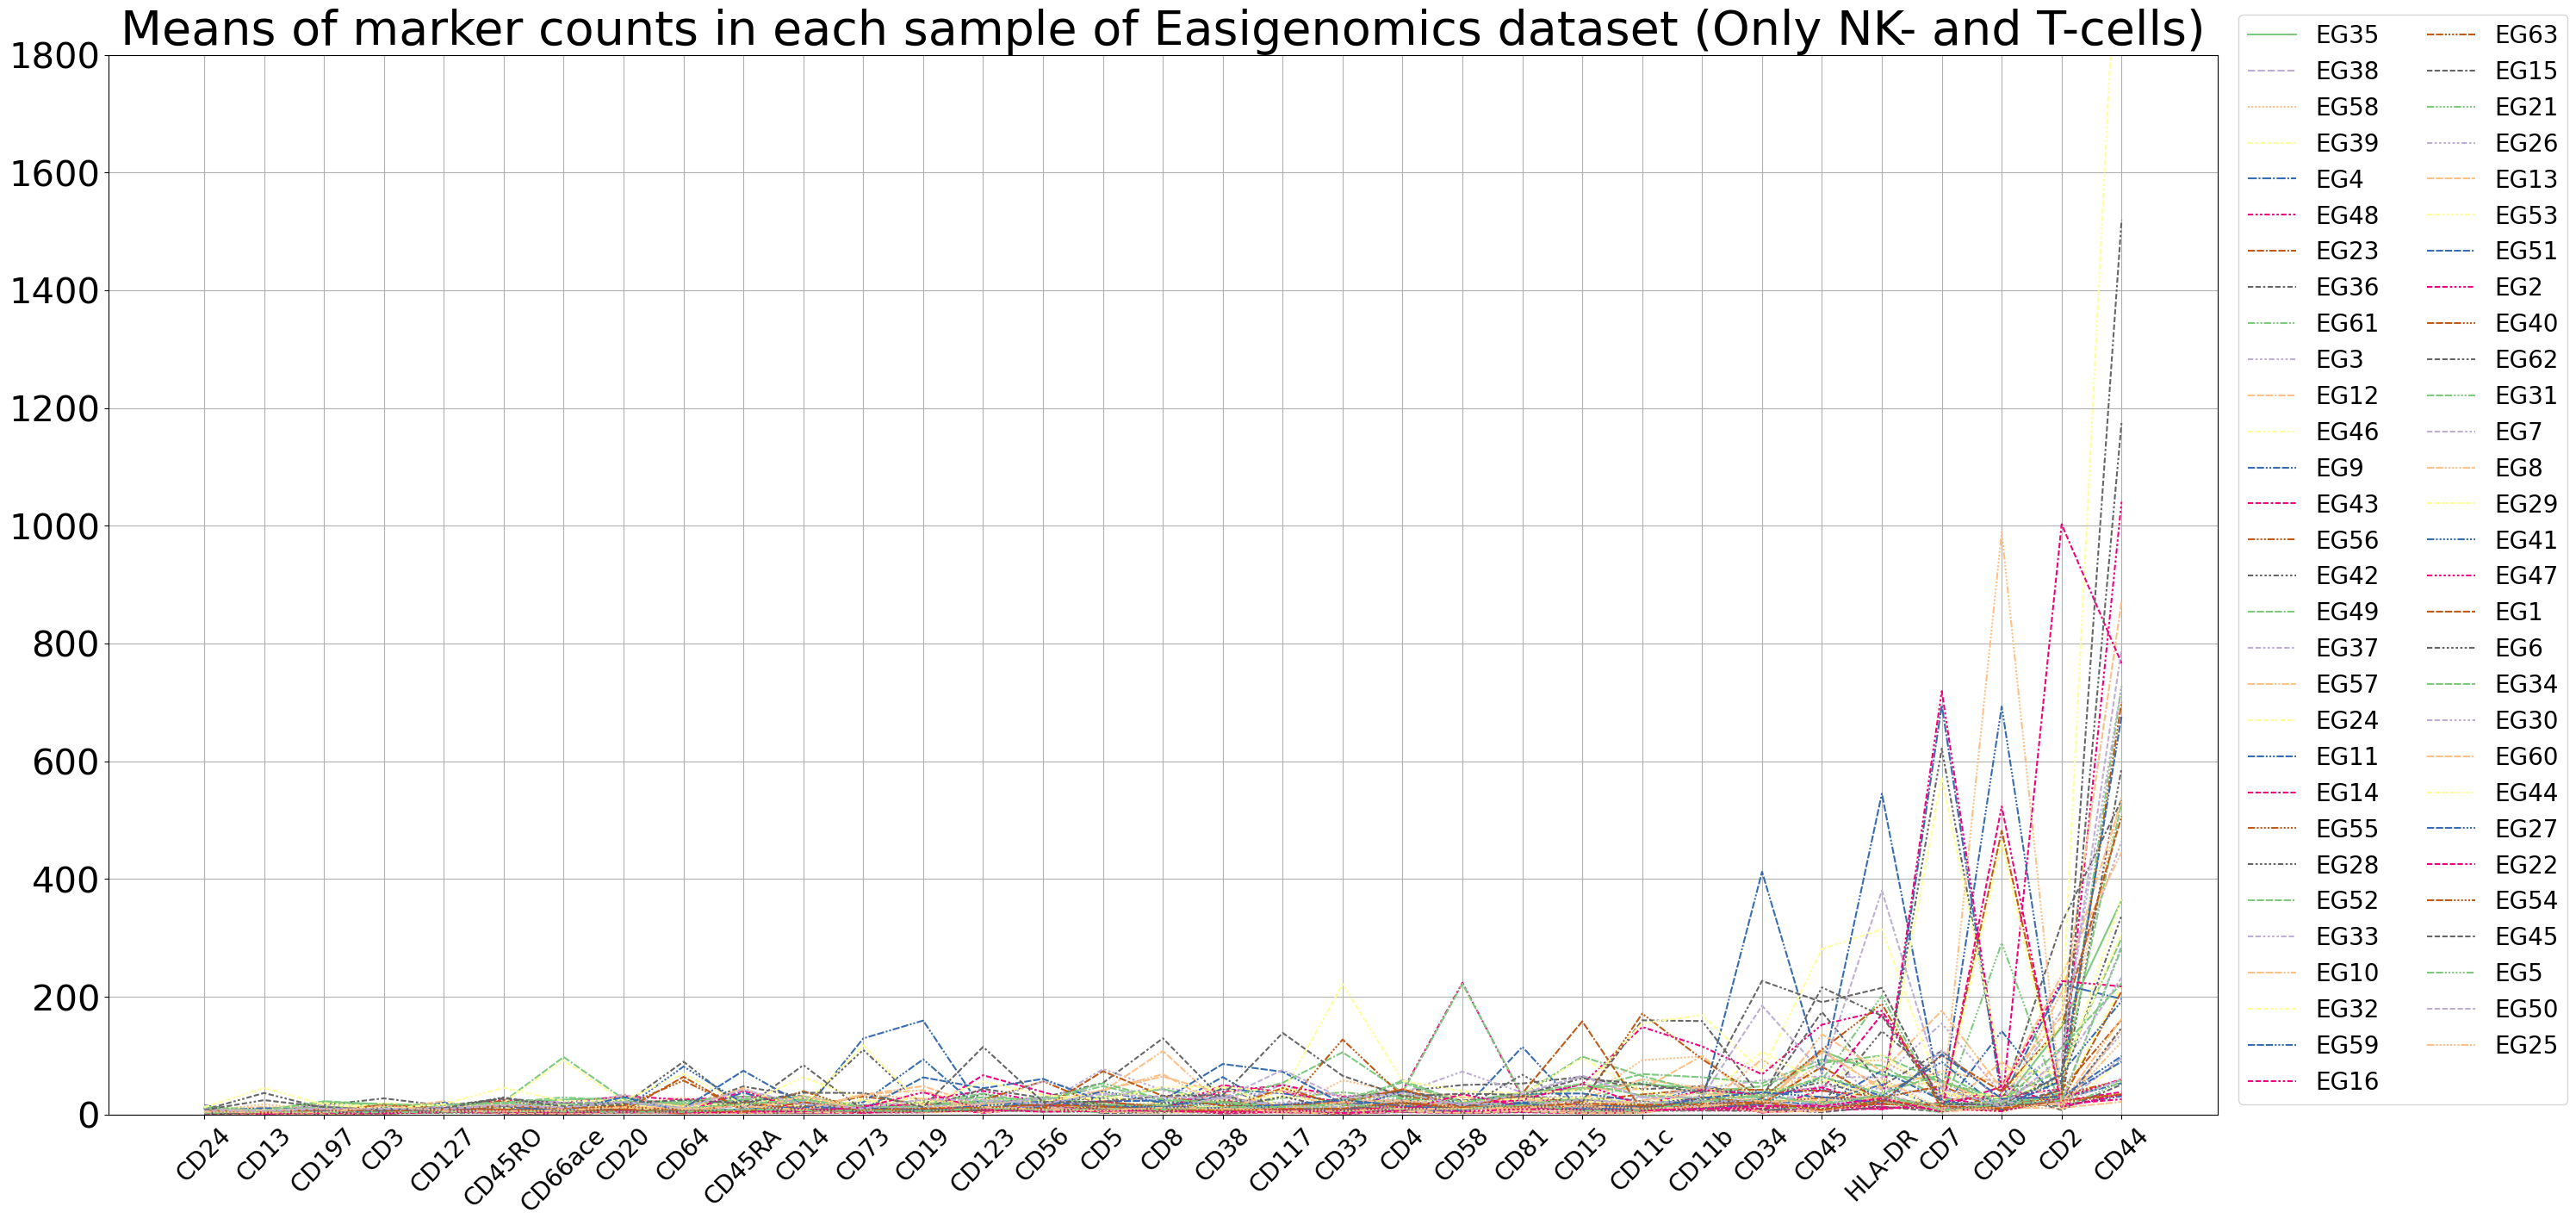

In [124]:
#only NK- and T-cells selected from each sample

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=df_sorted, palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 1800)
plt.title("Means of marker counts in each sample of Easigenomics dataset (Only NK- and T-cells)", fontsize=40) ;

plt.tight_layout()

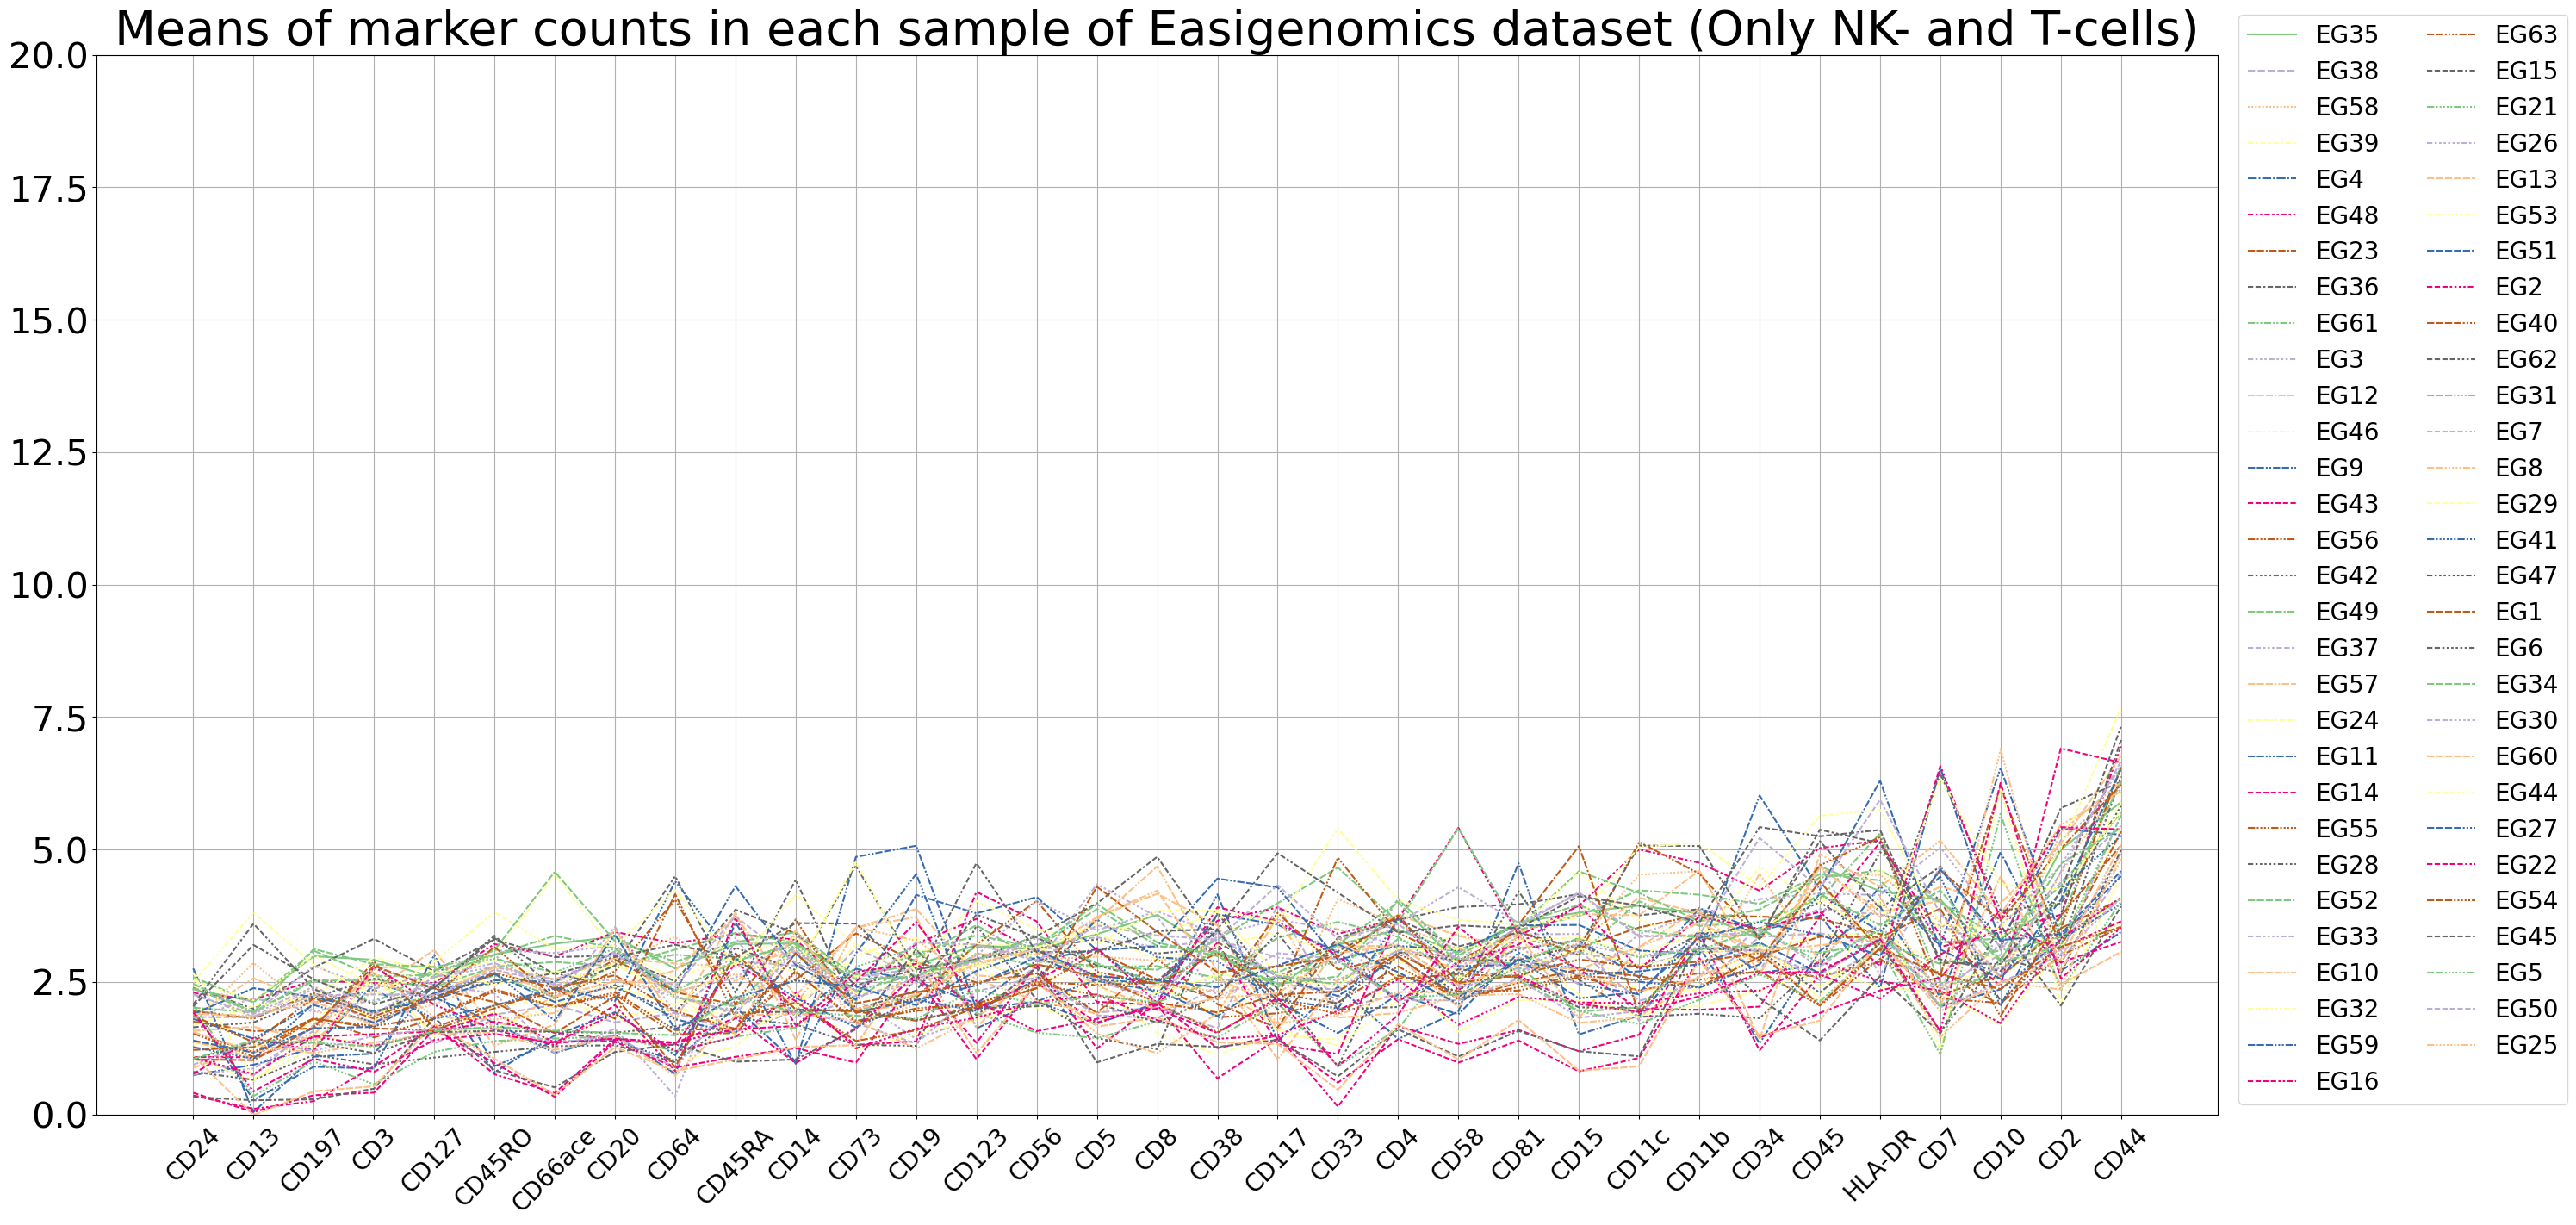

In [125]:
#only NK- and T-cells selected from each sample

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=np.log(df_sorted), palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 20)
plt.title("Means of marker counts in each sample of Easigenomics dataset (Only NK- and T-cells)", fontsize=40) ;

plt.tight_layout()

## Seurat

In [126]:
adata_s=adata[adata.obs['SAMPLE_SET'] == 'S' ]

In [127]:
#Only one sample in dataset

samples_s=adata_s.obs['POOL'].unique().tolist()

samples_s

['Seurat']

In [128]:
#save means of protein counts/each protein/each sample into a list

list_samples_s= []

for sample in samples_s:
    eg=adata_s[adata_s.obs['new_cell_type'] == 'T']
    eg=adata_s[adata_s.obs['POOL'] == sample]
    prot=eg.obsm['protein_expression']
    prot_mean=prot.mean(axis=0).sort_values()
    list_samples_s.append(prot_mean)

list_samples_s

[CD86       0.000000
 CD71       0.000000
 CD22       0.000000
 CD45       0.000000
 CD18       0.000000
             ...    
 CD4      379.623799
 CD27     386.752842
 CD8      689.009101
 CD3      696.089965
 CD11a    804.665584
 Length: 141, dtype: float64]

In [129]:
#save column names
proteins=adata_s.obsm['protein_expression'].columns



In [130]:
#creating a dataframe from list of lists

df_s= pd.DataFrame(list_samples_s, columns = proteins)

df_s

CD86  CD274  CD270  CD155  CD112  CD47  CD48  CD40  CD154  CD52  ...  \
0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0    0.0   0.0  ...   

   CD101  CD88  CD224      CD197      CD34  CD10  CD90  CD15  CD117  CD66ace  
0    0.0   0.0    0.0  16.512789  23.47547   0.0   0.0   0.0    0.0      0.0  

[1 rows x 141 columns]

In [131]:
df_s=df_s.T

df_s

0
CD86     0.0
CD274    0.0
CD270    0.0
CD155    0.0
CD112    0.0
...      ...
CD10     0.0
CD90     0.0
CD15     0.0
CD117    0.0
CD66ace  0.0

[141 rows x 1 columns]

In [132]:
#add column names

df_s.columns=samples_s

df_s

Seurat
CD86        0.0
CD274       0.0
CD270       0.0
CD155       0.0
CD112       0.0
...         ...
CD10        0.0
CD90        0.0
CD15        0.0
CD117       0.0
CD66ace     0.0

[141 rows x 1 columns]

In [133]:
df_s=df_s.T

In [134]:
#remove columns that contain only zeros

df_s = pd.DataFrame(df_s)
df_s != 0
(df_s != 0).any(axis=0)
df_s.loc[:, (df_s != 0).any(axis=0)]
df_s = df_s.loc[:, (df_s != 0).any(axis=0)]

df_s

CD3         CD8      CD56       CD19       CD11c      CD45RA  \
Seurat  696.089965  689.009101  9.365104  58.929185  252.408817  363.024158   

            CD123         CD4        CD14        CD16  ...     HLA-DR  \
Seurat  34.727805  379.623799  103.111517  123.946745  ...  173.32863   

             CD57      CD278       CD11a      CD79b       CD28        CD38  \
Seurat  29.061646  50.058601  804.665584  11.389329  50.321728  165.006767   

            CD127      CD197      CD34  
Seurat  81.150494  16.512789  23.47547  

[1 rows x 25 columns]

In [135]:
#sorting by mean

index_sort = df_s.mean().sort_values().index
df_sorted_s = df_s[index_sort]

df_sorted_s

CD25      CD56      CD79b      CD197      CD161      CD34  \
Seurat  7.125592  9.365104  11.389329  16.512789  23.423636  23.47547   

           CD45RO       CD57      CD123      CD278  ...        CD16  \
Seurat  28.320375  29.061646  34.727805  50.058601  ...  123.946745   

              CD38     HLA-DR       CD11c      CD45RA         CD4        CD27  \
Seurat  165.006767  173.32863  252.408817  363.024158  379.623799  386.752842   

               CD8         CD3       CD11a  
Seurat  689.009101  696.089965  804.665584  

[1 rows x 25 columns]

In [136]:
df_sorted_s=df_sorted_s.T

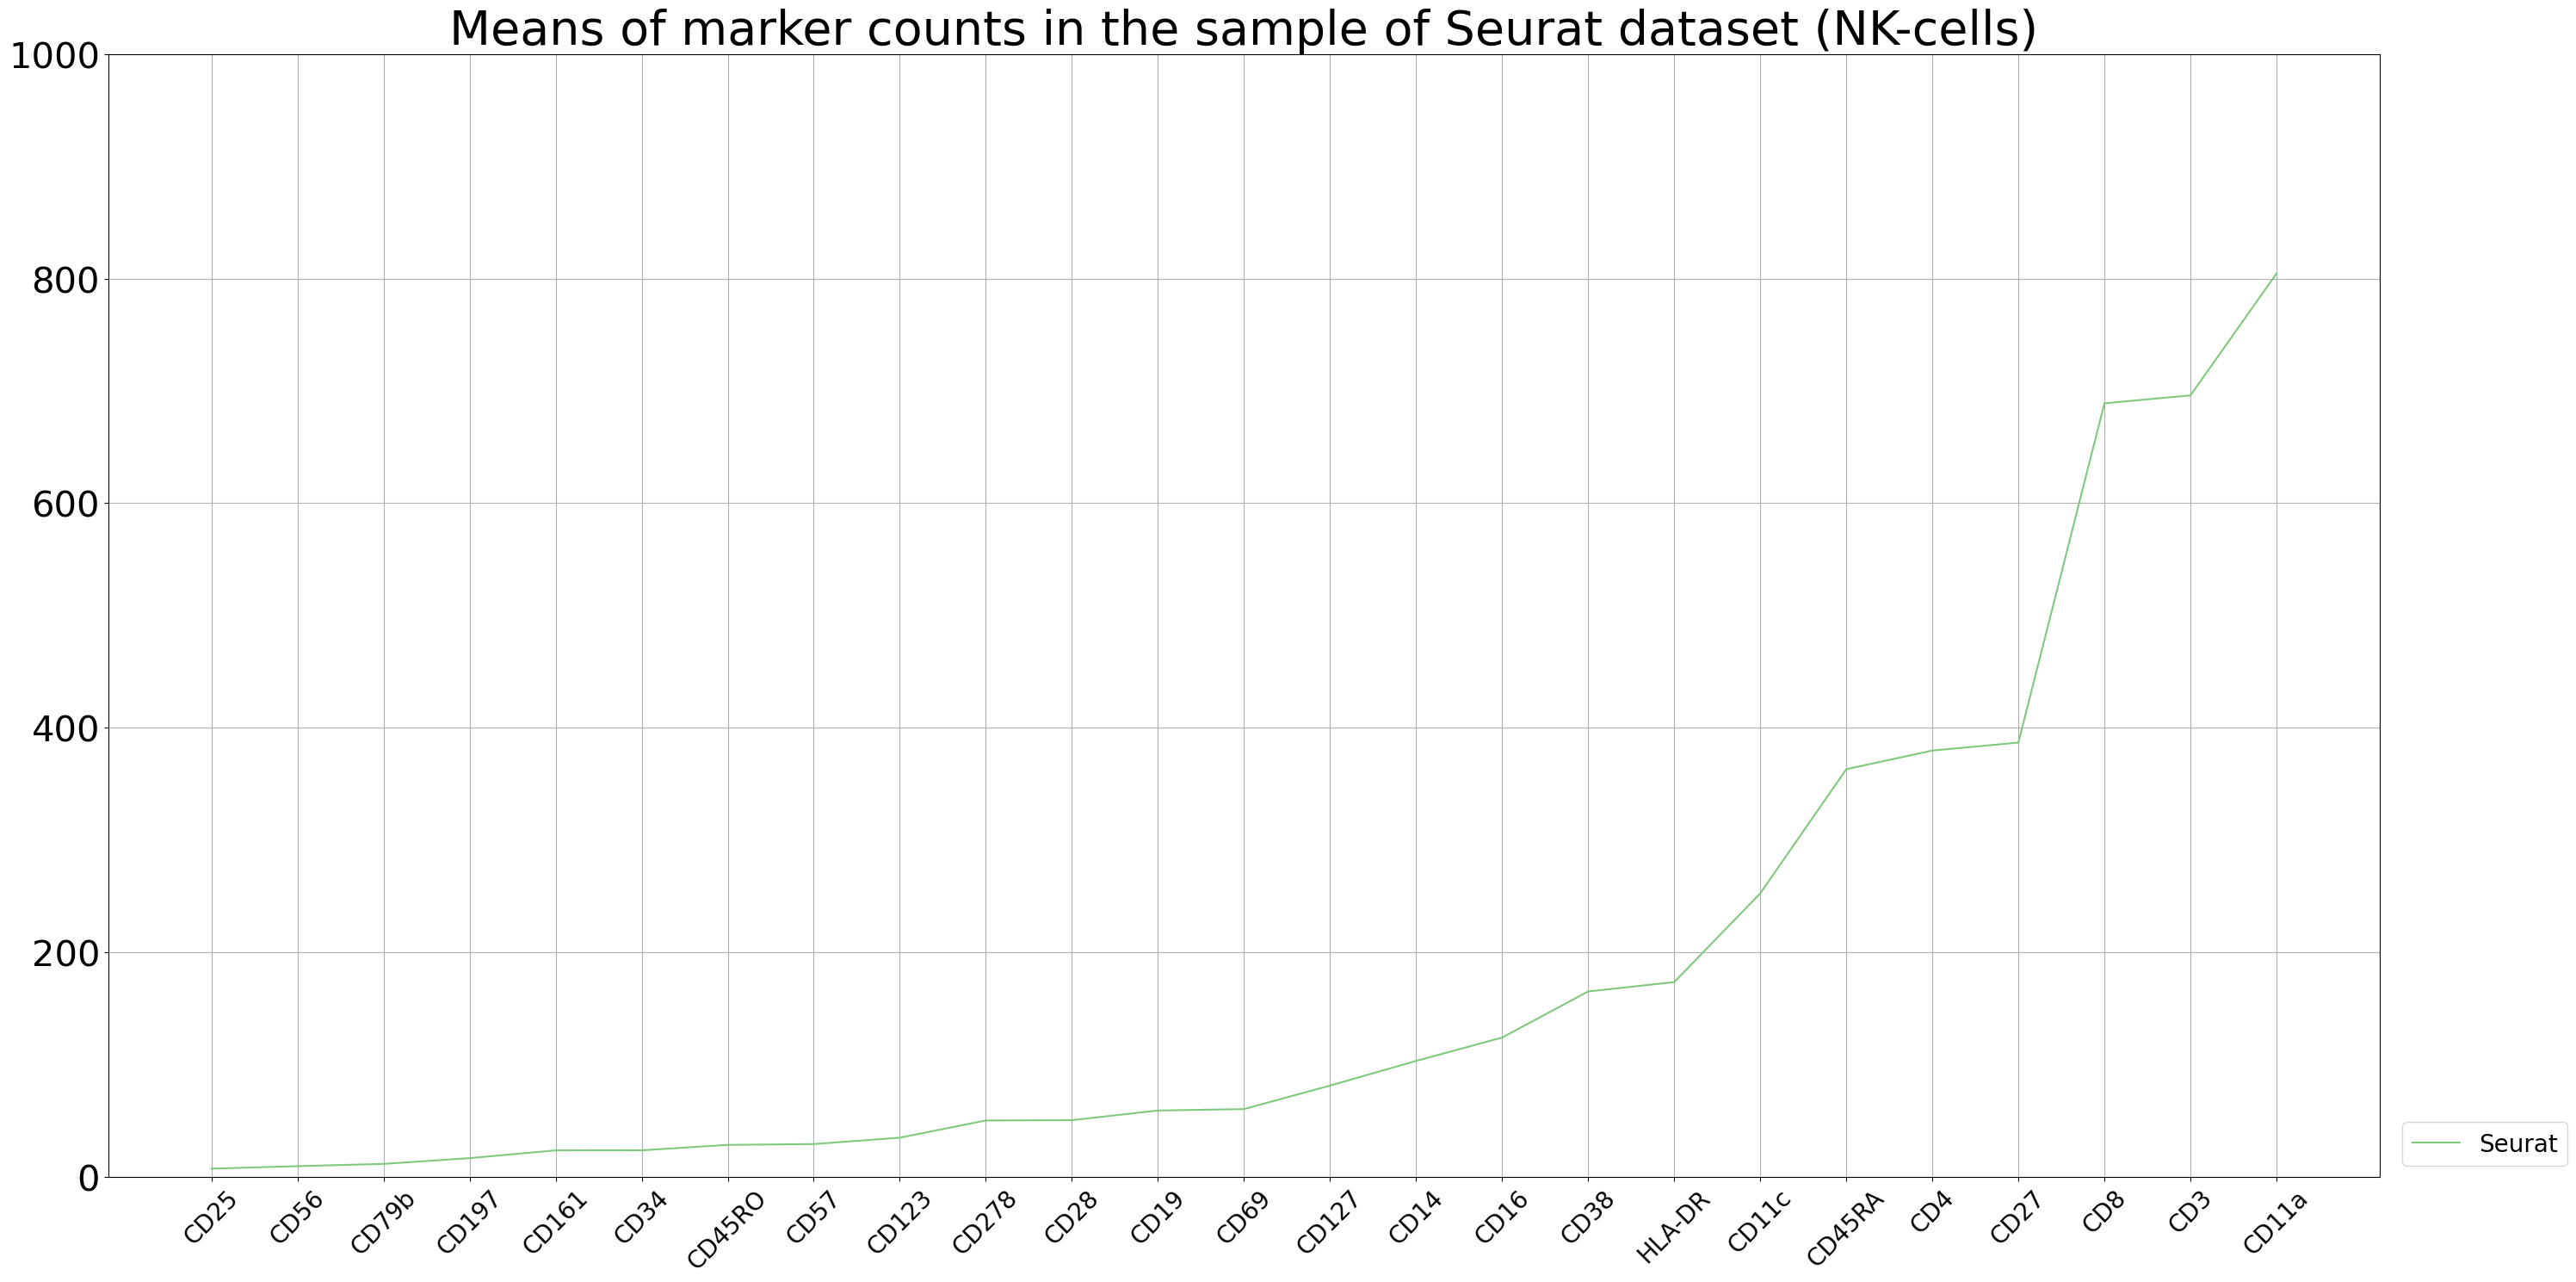

In [137]:
#only NK-cells selected from each sample, raw protein counts

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=df_sorted_s, palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20, facecolor='white')
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 1000)
plt.title("Means of marker counts in the sample of Seurat dataset (NK-cells)", fontsize=40) ;

plt.tight_layout()

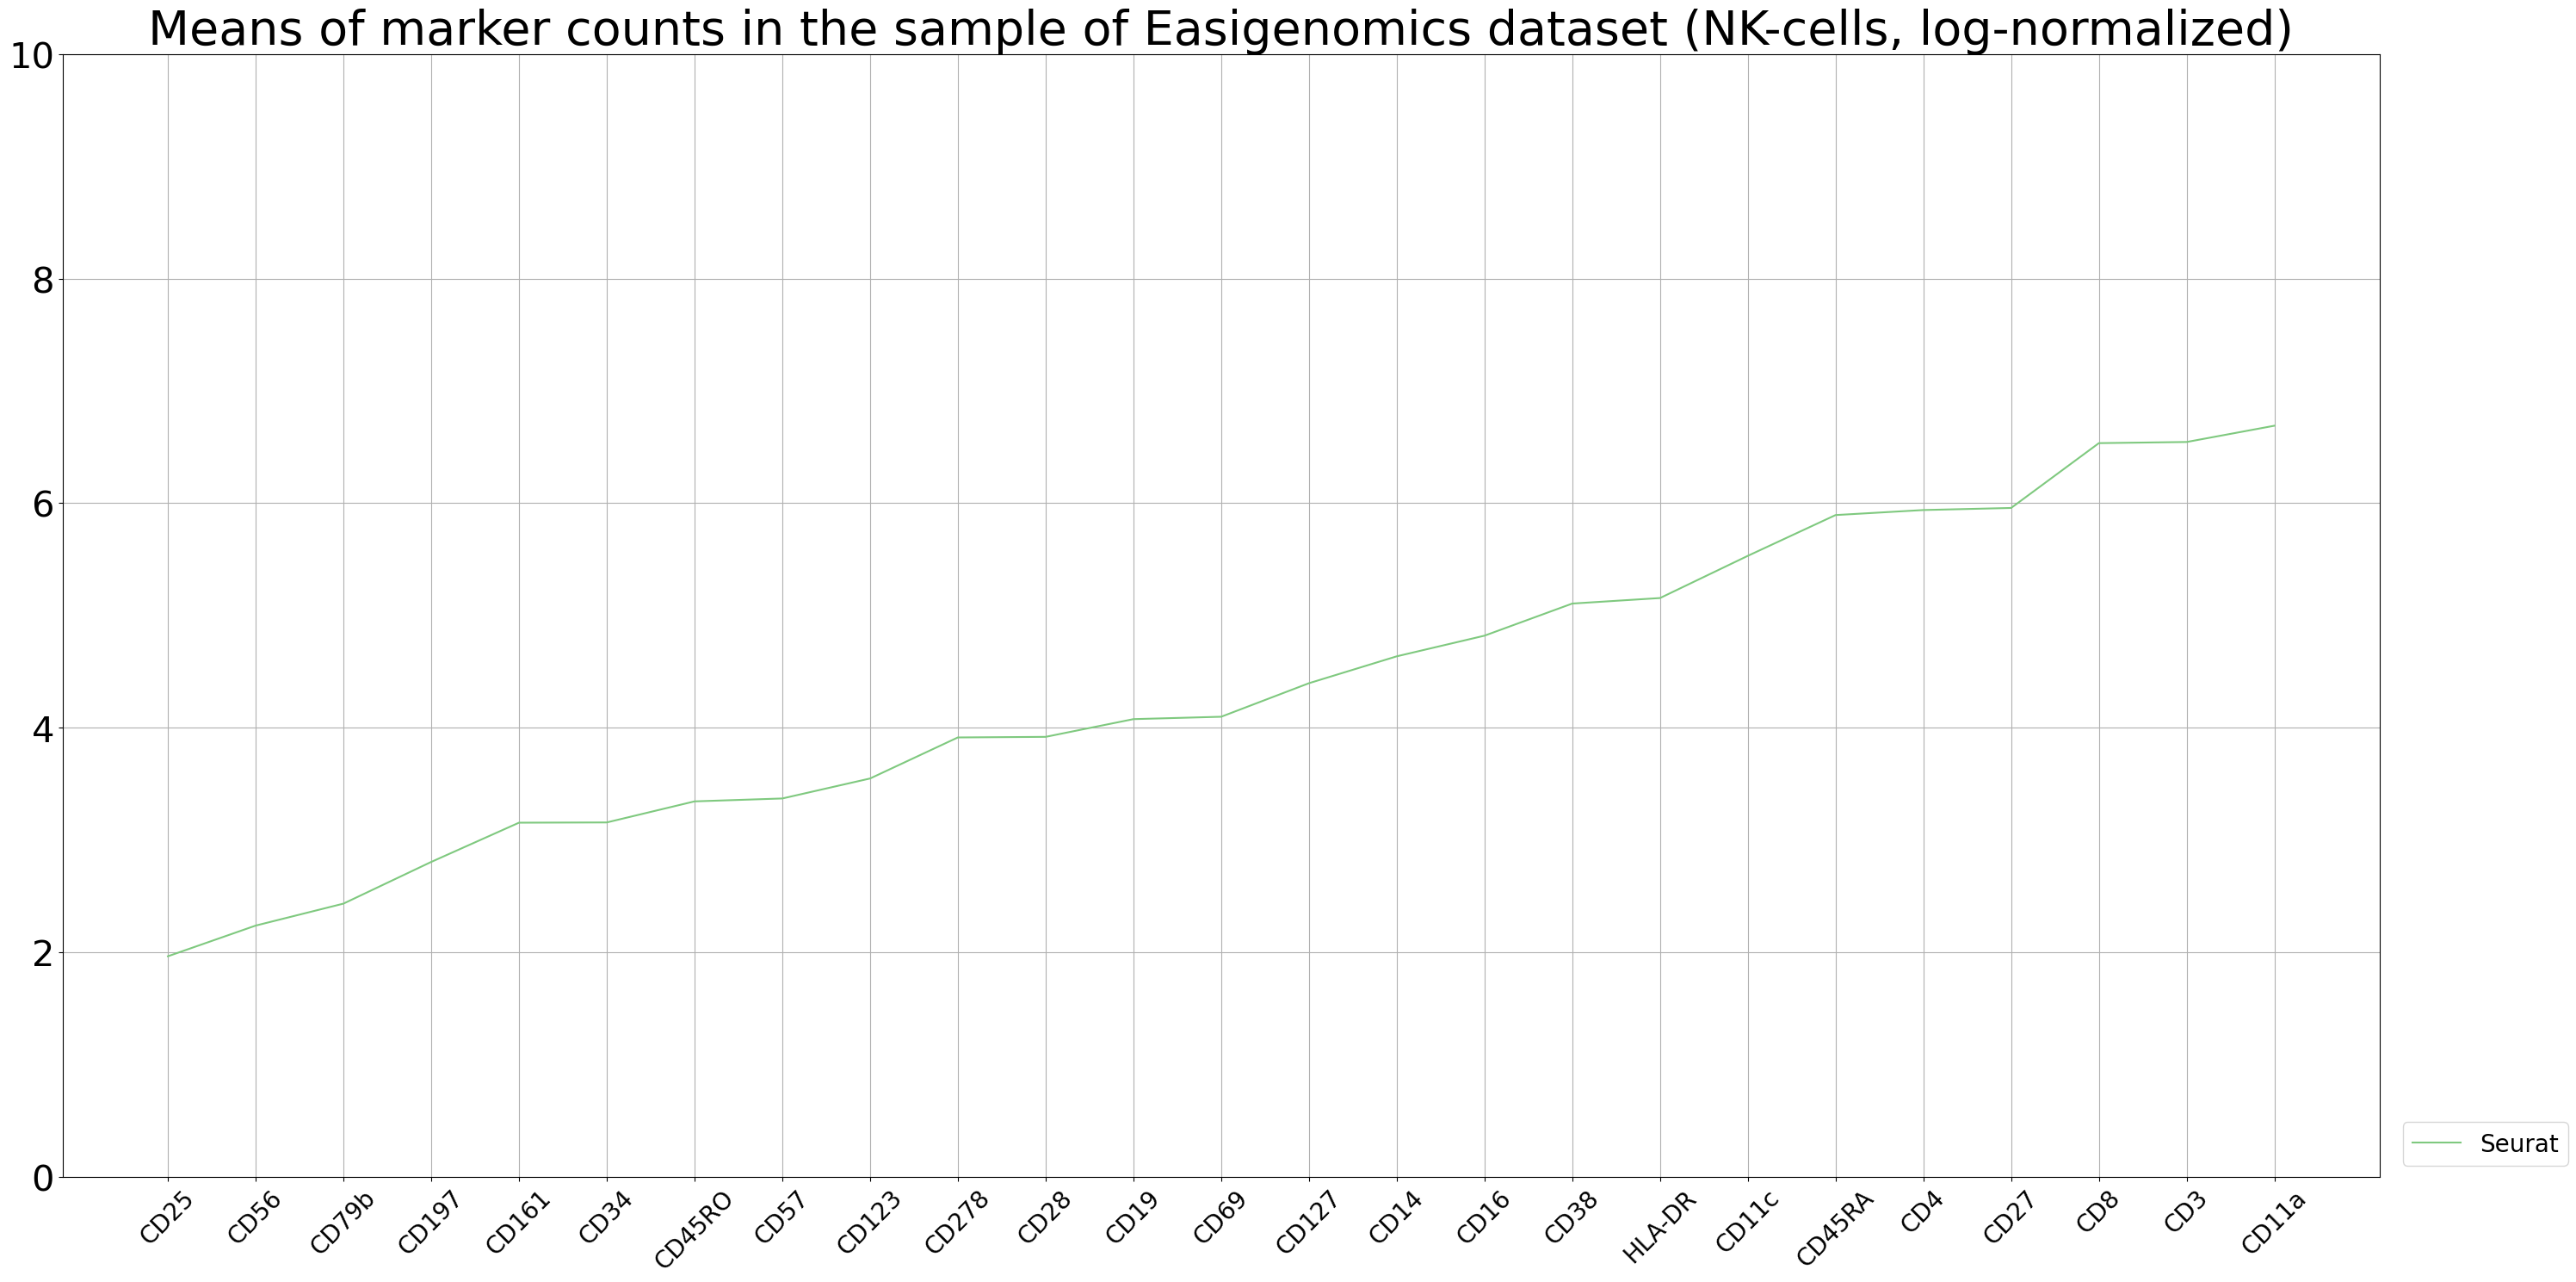

In [138]:

#only NK-cells selected from each sample, log-normalized protein counts

palette = sns.color_palette("Accent")

plt.figure(figsize=[30,15])
ax = sns.lineplot(data=np.log(df_sorted_s), palette=palette)
ax.legend(loc=(1.01, 0.01), ncol=2, fontsize = 20, facecolor='white')
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=30)
plt.grid()
plt.ylim(0, 10)
plt.title("Means of marker counts in the sample of Easigenomics dataset (NK-cells, log-normalized)", fontsize=40) ;

plt.tight_layout()